In [1]:
import importlib
import warnings
from collections import defaultdict
import altair as alt
from ipywidgets import Video, Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

warnings.filterwarnings('ignore')

def get_data():
    import pandas as pd
    data = []
    mn, mx = float("+inf"), float("-inf")

    for k, arr in loss_tracker.items():
        for i, v in enumerate(arr):
            data.append(dict(model=k, metric='loss', loss=v, epoch=i))
            mn = min(v, mn)
            mx = max(v, mx)

    return pd.DataFrame(data), mn, mx

def to_tensor(v):
    return torch.tensor(v, dtype=torch.float).unsqueeze(1)


def to_array(v):
    return v.detach().numpy()

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


# import matplotlib.font_manager
# matplotlib.font_manager.fontManager.addfont("C:/Users/Newton/Downloads/xkcd-script.ttf")
# matplotlib.font_manager.fontManager.addfont("C:/Users/Newton/Downloads/Humor-Sans-1.0.ttf")
# matplotlib.font_manager.fontManager.addfont("C:/Users/Newton/Downloads/Comic_Neue/ComicNeue-Regular.ttf")
# matplotlib.font_manager.fontManager.addfont("C:/Users/Newton/Downloads/xkcd.otf")
# plt.xkcd()

In [3]:
import taranis
import torch

loss_tracker = defaultdict(list)

# Linear Algebra

Matrix are 2D arrays. Tensor are N-D arrays

In [4]:
a = torch.Tensor([
    [0, 1, 2, 3],
    [4, 5, 6, 7],
])

print('A', a.shape)

b = torch.Tensor([
    [0, 1],
    [1, 2],
    [4, 5],
    [6, 7],
])

print('B', b.shape)

# Matrix multiply
# (2 x 4) * (4 x 2) => (2 x 2)
c = a @ b

print('C', c.shape)

A torch.Size([2, 4])
B torch.Size([4, 2])
C torch.Size([2, 2])


## Batch Multiply

In [5]:
a = a.unsqueeze(0)
b = b.unsqueeze(0)

a_batch = torch.cat([
    a,
    a,
    a,
])

b_batch = torch.cat([
    b,
    b,
    b,
])

print(a_batch.shape)
print(b_batch.shape)

a_batch[1]

torch.Size([3, 2, 4])
torch.Size([3, 4, 2])


tensor([[0., 1., 2., 3.],
        [4., 5., 6., 7.]])

In [6]:
c_batch_1 = torch.matmul(a_batch, b_batch)

print(c_batch_1.shape)

torch.Size([3, 2, 2])


In [7]:
# Equivalent to

results = []
for i in range(a_batch.shape[0]):
    results.append(
        (a_batch[i] @ b_batch[i]).unsqueeze(0)
    )
    
c_batch_2 = torch.cat(results)
print(c_batch_2.shape)

torch.Size([3, 2, 2])


In [8]:
(c_batch_1 == c_batch_2).all()

tensor(True)

# Machine Learning Primer



## Linear Regression

In [9]:
import yfinance as yf
import datetime

In [10]:
end = datetime.datetime.today()
start = end - datetime.timedelta(days=365)

GME = yf.download('GME', start=start, end=end, progress=False)
SP = yf.download('^GSPC', start=start, end=end, progress=False)

In [11]:
# GME_returns = (GME['Adj Close'] / GME['Adj Close'].shift()).dropna()
# SP_returns = (SP['Adj Close']  / SP['Adj Close'].shift()).dropna()

# plt.scatter(SP_returns, GME_returns)

In [12]:
def linear_reg(x, y):
    from sklearn.linear_model import LinearRegression
    reg = LinearRegression().fit(x.reshape(-1, 1), y)

    a = reg.coef_
    b = reg.intercept_
    
    return a, b

def linear_pred(a, b, x):
    return [a * v + b for v in x]

In [13]:
# x = SP_returns.values
# y = GME_returns.values

# a, b = linear_reg(x, y)
# pred = linear_pred(a, b, x)

# plt.plot(x, y, 'o')
# plt.plot(x, pred)
# print('Beta', a)

## 

In [120]:
eps = np.random.normal(0, 3, 21)

x = np.asarray(list(range(-10, 11)))
y = x ** 2 + eps

print('x:', x[:5])
print('y:', y[:5])

x: [-10  -9  -8  -7  -6]
y: [104.24407947  80.53017931  64.28224244  50.7770907   41.79629035]


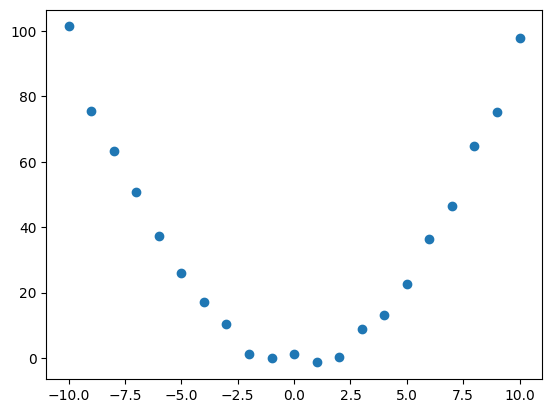

In [15]:
plt.scatter(x, y)

 Linear regression does not work for non linear data

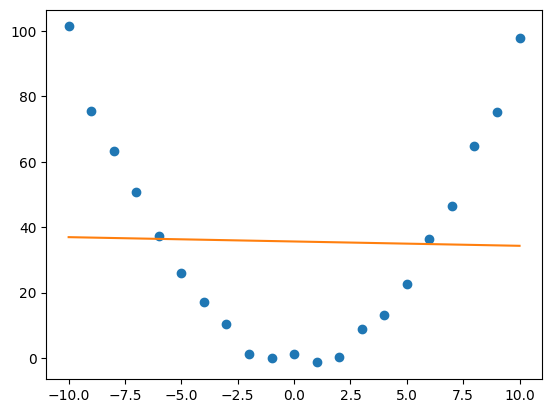

In [16]:
a, b = linear_reg(x, y)
pred = linear_pred(a, b, x)

plt.plot(x, y, 'o')
plt.plot(x, pred)

Instead of $y = a x + b$ we can do $y = a f(x) + b$ where $f$ is the non linearity 

If we know the non linearity we can linearize the relationship
by applying it, the resulting problem becomes linear again

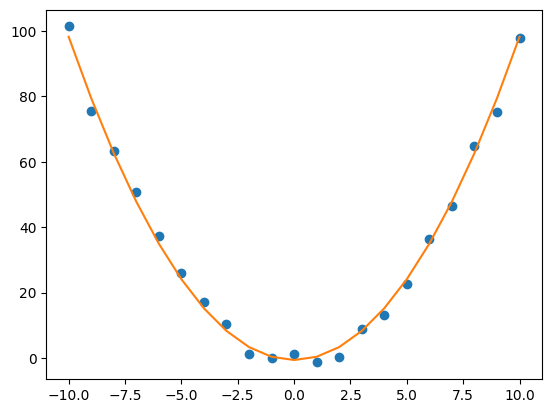

In [17]:
def f(x):
    return x ** 2


# linear_reg(x ** 2,y = x ** 2)
a, b = linear_reg(f(x), y)
pred = linear_pred(a, b, f(x))

plt.plot(x, y, 'o')
plt.plot(x, pred)


# y = x * a + b + sin(x) * a1 + x ** 2 * a2 + ....

The problem is: there is an infinity of non linearities and the data can get pretty complex for find non linearity by ourself is not an option. Thankfully Neural Network can approximate any functions and thus learn the non linearity for us.

# Making a Linear Regression in Pytorch

In [18]:
model = nn.Linear(1, 1)      # 1 Input 1 output : a * x + b

##  Generate data

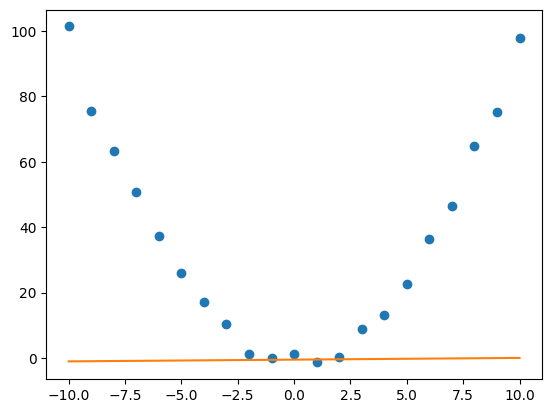

In [19]:
def show_model_estimate(model, x, y):    
    pred = to_array(model(to_tensor(x)))

    plt.plot(x, y, 'o')
    plt.plot(x, pred)
    
show_model_estimate(model, x, y)

2356.53759765625
1405.837158203125
1052.0247802734375
1049.0496826171875
1049.06787109375
1049.0863037109375
1049.104736328125
1049.1229248046875
1049.141357421875
1049.1595458984375


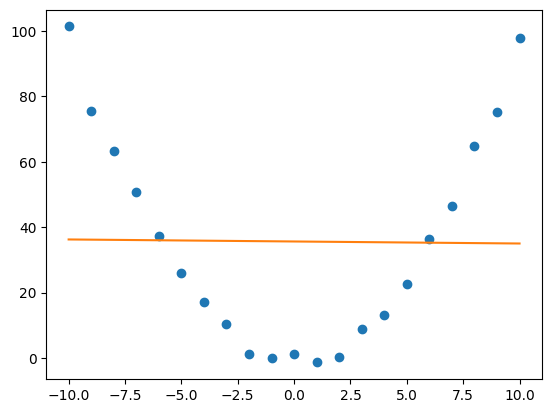

In [20]:
def train_step(model, x, y, optimizer):
    optimizer.zero_grad()                  # Clear derivative
    
    # out = model(input)
    pred = model(to_tensor(x))             # Make Prediction
    
    
    # (out - y) ^ 2
    loss = F.mse_loss(pred, to_tensor(y))  # Grade prediction
    
    loss.backward()                        # Compute derivative
    
    optimizer.step()                       # Update weights
    return loss.item()

    
def train_reg(model, x, y, epoch=100, lr=1, cb=None, noprint=False):
    optimizer = optim.Adadelta(model.parameters(), lr=1)

    for i in range(epoch):
        loss = train_step(model, x, y, optimizer)
    
        if i % (epoch / 10) == 0:
            if not noprint:
                print(loss)
            
        if cb:
            cb()
            

train_reg(model, x, y, 20000)
show_model_estimate(model, x, y)

# Making Non Linear Regression

## Making the Model deeper ?

In [21]:

# x * a1 + x * a2 + ... +  x * a 100
model = nn.Sequential(
    nn.Linear(1, 100),      #  o1  = x * w1 + b1     x: (N x 1) w1: (1 x 100)  b1: (1 x 100) o1: (N x 100)
    nn.Linear(100, 30),     #  o2 = o1 * w2 + b2                w2: (100 x 30) b2: (1 x  30) o2: (N x 30)
    nn.Linear(30, 1)        #  o3 = o2 * w3 + b3                w3: (30 x 1)   b3: (1 x 1)   
)


\begin{align}
    o_{1} &= x \cdot w_1 + b_1 \\
    o_{2} &= o_1 \cdot w_2 + b_2 \\
    o_{3} &= o_3 \cdot w_3 + b_3
\end{align}

Expand

\begin{align}
    o_3 &= ((x \cdot w_1 + b_1) \cdot w_2 + b_2) \cdot w_3 + b_3 \\
    o_3 &= (x \cdot w_1 + b_1) \cdot w_2 \cdot w_3 + b_2 \cdot w_3 + b_3 \\
    o_3 &= x \cdot w_1 \cdot w_2 \cdot w_3 + b_1 \cdot w_2 \cdot w_3 + b_2 \cdot w_3 + b_3
\end{align}

Lets define

\begin{align}
    W &= w_1 \cdot w_2 \cdot w_3 \\ 
    B &= b_1 \cdot w_2 \cdot w_3 + b_2 \cdot w_3 + b_3
\end{align}

The resulting network is still linear

\begin{align}
    o_3 &= x \cdot W + B
\end{align}

2303.131103515625
1062.053955078125
1086.3060302734375
1059.1192626953125
1059.8773193359375
1059.048095703125
1061.686279296875
1060.0018310546875
1056.333251953125
1056.77197265625


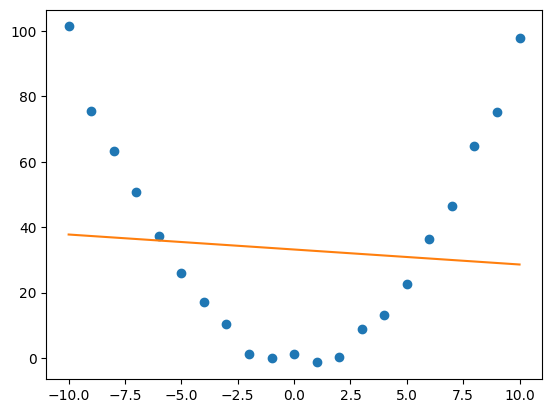

In [22]:
train_reg(model, x, y, 1000, lr=0.001)
show_model_estimate(model, x, y)

# Break linearity with a non linear activation function

Activation function often use $\sigma$ as symbol

* threshold
* relu
* hardtanh
* hardswish
* relu6
* elu
* selu
* celu
* leaky_relu
* prelu
* rrelu
* glu
* sigmoid
* tanh
* ....

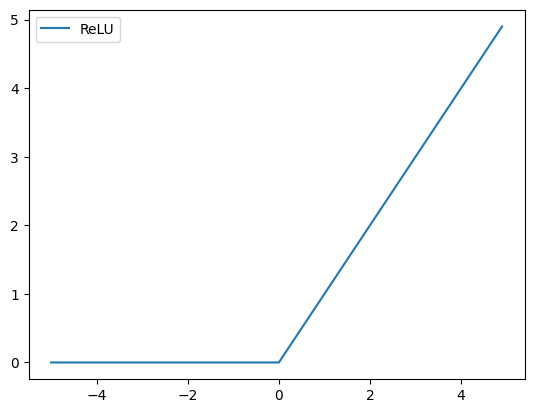

In [23]:
functions = [nn.ReLU()]

for f in functions:
    xx = np.asarray(list(range(-50, 50)))/10
    relu_result = to_array(f(to_tensor(xx)))

    plt.plot(xx, relu_result, label=f.__class__.__name__)
    plt.legend(loc="upper left")

In [24]:
model = nn.Sequential(
    nn.Linear(1, 2),   # o1 = x * w1 + b1        #  o1 = [x * w11 + b11, x * w12 + b12]
    nn.ReLU(),         # o2 = max(o1, 0)         #  o2 = [max(x * w11 + b11, 0), max(x * w12 + b12, 0)]
    nn.Linear(2, 1),   # o3 = o2 * w2 + b2       #  o3 = max(x * w11 + b11, 0) * w21 + max(x * w12 + b12, 0) * w22 + b2
)

# The estimator is now non linear
# o3 = max(x * w1 + b1, 0) * w2 + b2 

# Without matrices
#
# o3 = max(x * w11 + b11, 0) * w21 + max(x * w12 + b12, 0) * w22 + b2
#     |--------------------------|  |--------------------------|
#      First Linear Approximation    Second Linear Approximation
#
#
#  We are learning a piecewise approximation of our function
#  piecewise linear is still non linear and we can get as close as we want by
#  increasing the number of neurons.
#
#  https://en.wikipedia.org/wiki/Piecewise_linear_function




In Matrix form

\begin{align}
    o_{1} &= x \cdot w_1 + b_1 \\
    o_{2} &= \max(x \cdot w_1 + b_1, 0) \\
    o_{3} &= \max(x \cdot w_1 + b_1, 0) \cdot w_2 + b_2
\end{align}

As Scalars

\begin{align}
    o_{1} &= \begin{bmatrix} x \cdot w_{11} + b_{11} & x \cdot w_{12} + b_{12} \end{bmatrix} \\
    o_{2} &= \begin{bmatrix} \max(x \cdot w_{11} + b_{11}, 0) & \max(x \cdot w_{12} + b_{12}, 0) \end{bmatrix} \\
    o_{3} &= \max(x \cdot w_{11} + b_{11}, 0) \cdot w_{21} + \max(x \cdot w_{12} + b_{12}, 0) \cdot w_{22} + b_{2}
\end{align}


2483.76025390625
2093.36181640625
1265.7100830078125
1213.5413818359375
1152.5274658203125
1045.208740234375
978.1070556640625
930.8592529296875
884.6622314453125
846.3342895507812


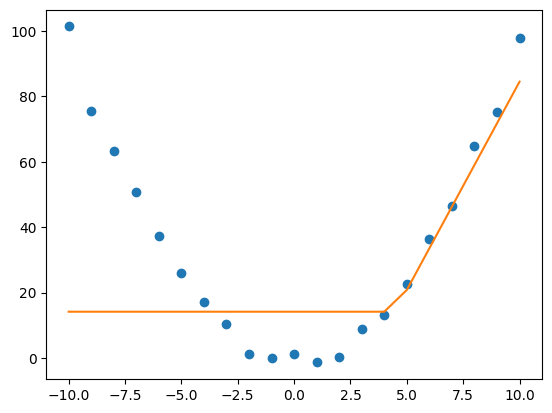

In [25]:
model = nn.Sequential(
    nn.Linear(1, 2),   # o1 = x * w1 + b1        #  o1 = [x * w11 + b11, x * w12 + b12]
    nn.ReLU(),         # o2 = max(o1, 0)         #  o2 = [max(x * w11 + b11, 0), max(x * w12 + b12, 0)]
    nn.Linear(2, 1),   # o3 = o2 * w2 + b2       #  o3 = max(x * w11 + b11, 0) * w21 + max(x * w12 + b12, 0) * w22 + b2
)
train_reg(model, x, y, 2000, lr=1)
show_model_estimate(model, x, y)

In [26]:
from ipywidgets import interact
import ipywidgets as widgets

functions = [nn.ReLU, nn.Tanh, nn.Sigmoid, nn.SiLU]


def scale(x):
    return x


def slider(mn=-5, mx=5):
    return widgets.FloatSlider(min=mn, max=mx, step=0.3, value=1)


# @interact(w11=rng, w12=rng, b11=rng, b12=rng, w21=rng, w22=rng, b2=rng)
def manual_model(w11, w12, b11, b12, w21, w22, b2, fn):
    model = nn.Sequential(
        nn.Linear(1, 2),   
        fn(),         
        nn.Linear(2, 1),   
    )
    
    w1, b1, w2, b2 = list(model.parameters())
    
    w1.data [0][0] = scale(w11)
    w1.data [1][0] = scale(w12)
    
    b1.data [0] = scale(b11)
    b1.data [1] = scale(b12)
    
    w2.data [0][0] = scale(w21)
    w2.data [0][1] = scale(w22)
    
    b2.data [0] = b2
    
    show_model_estimate(model, x, y)
    

interact(manual_model, w11=slider(), w12=slider(), b11=slider(), b12=slider(), w21=slider(), w22=slider(), b2=slider(), fn=functions)

interactive(children=(FloatSlider(value=1.0, description='w11', max=5.0, min=-5.0, step=0.3), FloatSlider(valu…

<function __main__.manual_model(w11, w12, b11, b12, w21, w22, b2, fn)>

In [27]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

weights = model.state_dict()

def animate(i):
    model = nn.Sequential(
        nn.Linear(1, 2),   
        nn.ReLU(),         
        nn.Linear(2, 1),
    )
    model.load_state_dict(weights)

    w = list(model.parameters())[0]
    w.data[0] = -1
    w.data[1] = +1
    
    train_reg(model, x, y, int(i), lr=1, noprint=True)
    
    show_model_estimate(model, x, y)

interact(animate, i=widgets.IntSlider(min=0, max=2000, value=0))

interactive(children=(IntSlider(value=0, description='i', max=2000), Output()), _dom_classes=('widget-interact…

<function __main__.animate(i)>

2480.8154296875
2126.73388671875
1149.42138671875
1100.6529541015625
1031.8900146484375
945.4224243164062
903.4210205078125
862.228515625
825.1849975585938
793.6858520507812


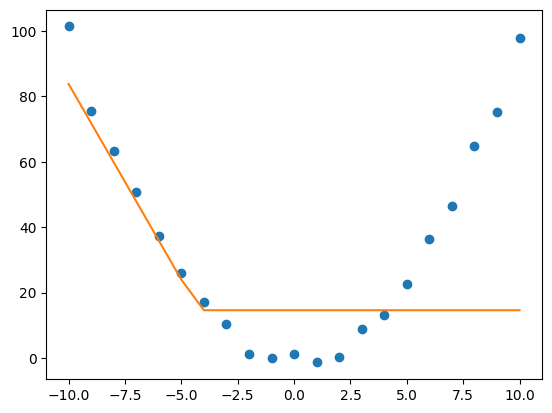

In [28]:
model = nn.Sequential(
    nn.Linear(1, 2),   # o1 = x * w1 + b1        #  o1 = [x * w11 + b11, x * w12 + b12]
    nn.ReLU(),         # o2 = max(o1, 0)         #  o2 = [max(x * w11 + b11, 0), max(x * w12 + b12, 0)]
    nn.Linear(2, 1),   # o3 = o2 * w2 + b2       #  o3 = max(x * w11 + b11, 0) * w21 + max(x * w12 + b12, 0) * w22 + b2
)

# The estimator is now non linear
# o3 = max(x * w1 + b1, 0) * w2 + b2 

train_reg(model, x, y, 2000, lr=1)
show_model_estimate(model, x, y)

# Increase number of neurons to reduce randomness

2367.43701171875
41.7078742980957
25.643564224243164
19.66471290588379
17.64639663696289
17.210569381713867
17.007461547851562
17.058311462402344
17.21693992614746
17.409896850585938


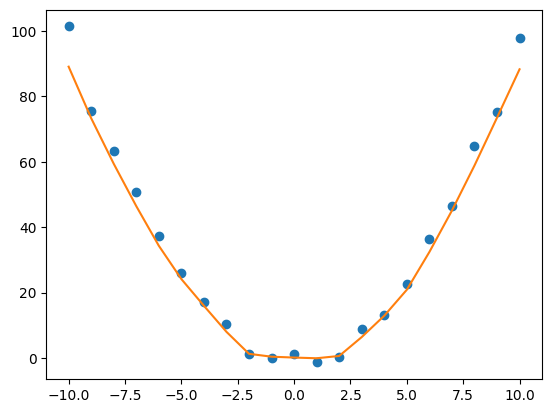

In [29]:
model = nn.Sequential(
    nn.Linear(1, 1024),  
    nn.ReLU(),             
    nn.Linear(1024, 1), 
)

train_reg(model, x, y, 2000)
show_model_estimate(model, x, y)

17.559471130371094
8.141531944274902
9.56261157989502
10.492454528808594
10.774893760681152
11.001335144042969
11.204150199890137
11.25294017791748
11.37197494506836
11.364861488342285


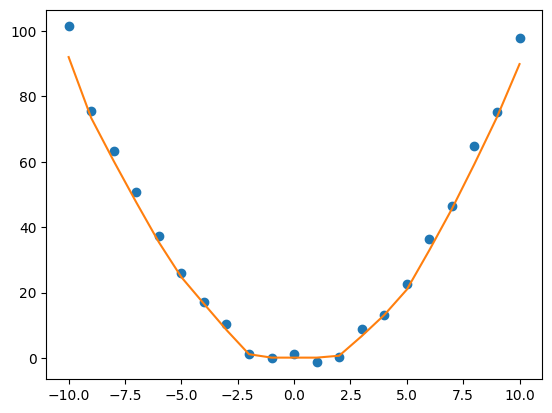

In [30]:
train_reg(model, x, y, 2000, lr=0.1)
show_model_estimate(model, x, y)

# Non Linear correlation

Cor matrix:
 [[ 1.         -0.02472911]
 [-0.02472911  1.        ]]
--


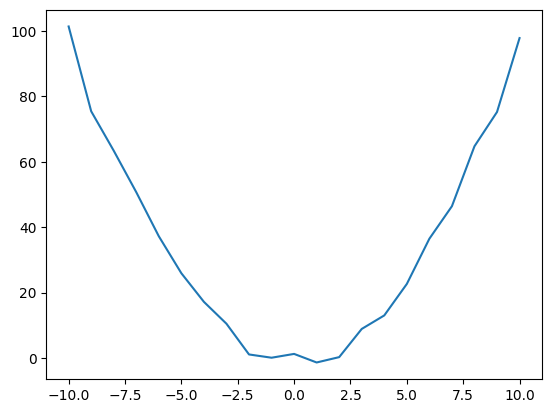

In [31]:
# Regular linear Correlation does not work well shows x, y are essentially not correlated
print('Cor matrix:\n', np.corrcoef(x, y))
print('--')
plt.plot(x, y)

[[1.         0.99878445]
 [0.99878445 1.        ]]


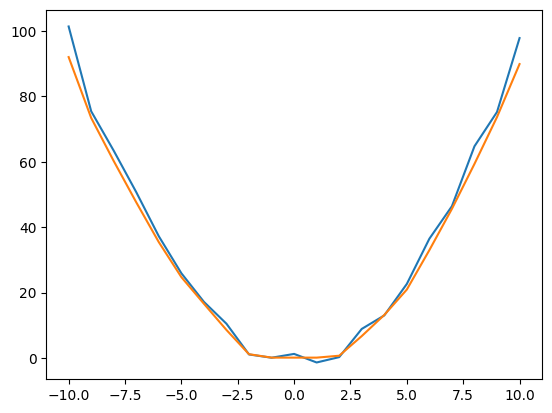

In [32]:
pred = model(to_tensor(x)).detach().squeeze().numpy()

#
# Correlation is essentially one
#
print(np.corrcoef(pred, y))

plt.plot(x, y)
plt.plot(x, pred)

# Overfitting

## Split the data in 2

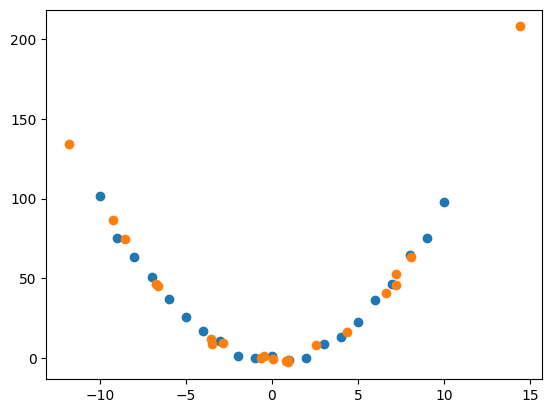

In [33]:
xvalid = np.asarray([xx + np.random.normal(0, 3) for xx in x])
yvalid = xvalid ** 2 + eps

plt.scatter(x, y)
plt.scatter(xvalid, yvalid)

In [34]:
def train_reg_stop(model, x, y, epoch=100, lr=1, cb=None, noprint=False):
    optimizer = optim.Adadelta(model.parameters(), lr=1)
    prev_valid_loss = 100000
    
    for i in range(epoch):
        loss = train_step(model, x, y, optimizer)
        
        # New here
        with torch.no_grad():
            pred = model(to_tensor(xvalid))             
            loss_valid = F.mse_loss(pred, to_tensor(yvalid)).item()

        
        if loss_valid < prev_valid_loss:
            prev_valid_loss = loss_valid
        else:
            print(f'Stopped before overfitting (epoch: {i}) (loss: {loss_valid:.2f})')
            break
            
        
        if i % (epoch / 10) == 0:
            if not noprint:
                print(loss)
            

2400.64697265625
Stopped before overfitting (epoch: 74) (loss: 484.99)


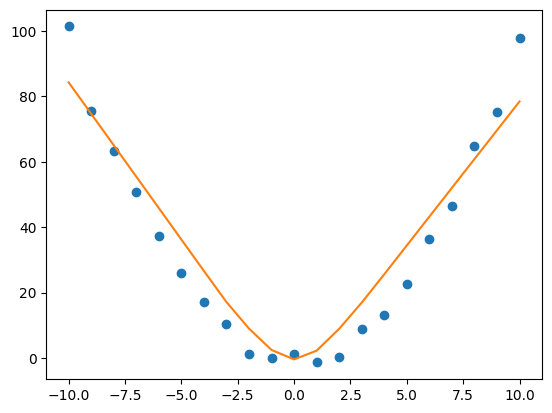

In [35]:
model = nn.Sequential(
    nn.Linear(1, 1024),  
    nn.ReLU(),             
    nn.Linear(1024, 1), 
)

train_reg_stop(model, x, y, 20000, lr=0.1)

show_model_estimate(model, x, y)

1937.6527099609375
73.23519134521484
45.01652145385742
34.791316986083984
28.789350509643555
24.91389274597168
22.460378646850586
21.41324234008789
20.810632705688477
20.50796890258789


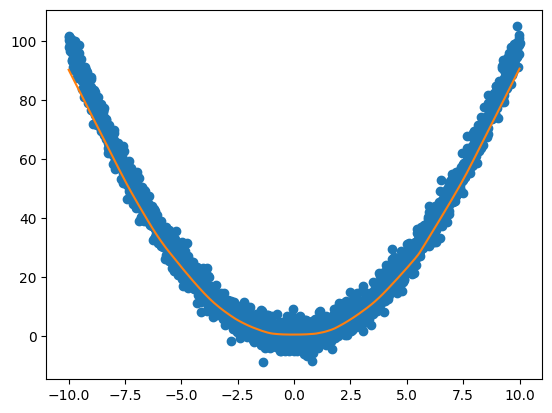

In [36]:
num = 1000

eps = np.random.normal(0, 3, num * 2 + 1)

xmore = np.asarray(list(range(-num, num + 1))) / 100
ymore = xmore ** 2 + eps

model = nn.Sequential(
    nn.Linear(1, 1024),  
    nn.ReLU(),             
    nn.Linear(1024, 1), 
)

train_reg(model, xmore, ymore, 1000, lr=.1)

show_model_estimate(model, xmore, ymore)

# Generalization

Current models are not able to learn or infer outside of the training set
if we increase the domain of the function from $[-10, 10]$ we can see that the error will keep increasing.

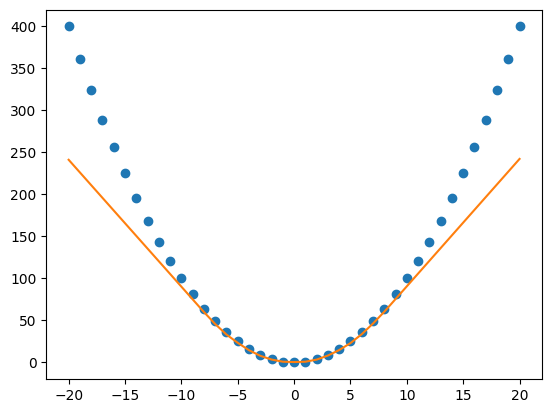

In [37]:
x = np.asarray(list(range(-20, 21)))
y = x ** 2

show_model_estimate(model, x, y)

# With sin the issue is more obvious

In [38]:
def show_model_estimate(model, x, y):    
    pred = to_array(model(to_tensor(x)))

    plt.plot(x, y)
    plt.plot(x, pred)

0.6299166679382324
0.026004046201705933
0.018830804154276848
0.01369952131062746
0.010311498306691647
0.007939712144434452
0.006385851185768843
0.005253807175904512
0.004441496916115284
0.0038331691175699234


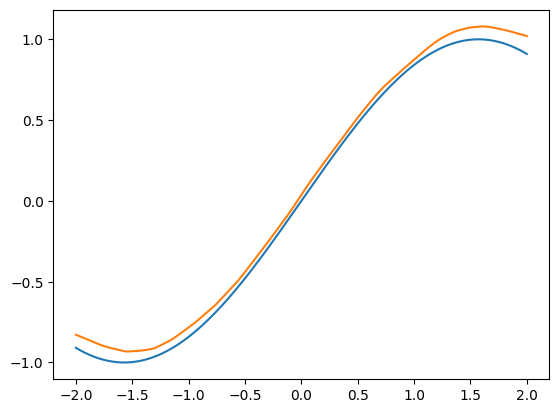

In [39]:
x = np.asarray(list(range(-100, 101))) / 50
y = np.sin(x)

model = nn.Sequential(
    nn.Linear(1, 128),  
    nn.ReLU(),             
    nn.Linear(128, 1), 
)

train_reg(model, x, y, 2000)

show_model_estimate(model, x, y)

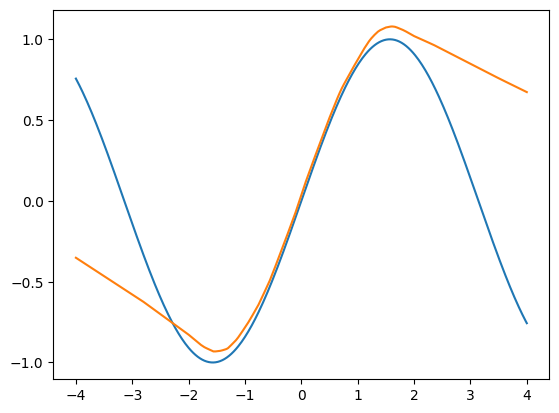

In [40]:
x = np.asarray(list(range(-200, 201))) / 50
y = np.sin(x)

show_model_estimate(model, x, y)

0.9372447729110718
0.19917866587638855
0.0660342425107956
0.03455003350973129
0.027894143015146255
0.030814213678240776
0.03491171821951866
0.038059454411268234
0.041001997888088226
0.041684601455926895


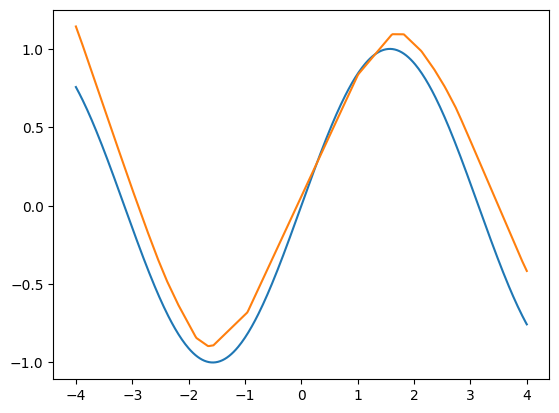

In [41]:
x = np.asarray(list(range(-200, 201))) / 50
y = np.sin(x)

model = nn.Sequential(
    nn.Linear(1, 512),  
    nn.ReLU(),             
    nn.Linear(512, 1), 
)

train_reg(model, x, y, 4000)

show_model_estimate(model, x, y)

# Vision introduction

## Dataset

In [42]:
from torchvision import datasets
from torchvision import transforms

In [43]:
dataset = datasets.MNIST(
    '../data', 
    train=True, 
    download=True
)
print(len(dataset))

60000


In [44]:
image, label = dataset[0]
print(image.size, label)  # A Black and white image is a 2D matrix (28x28)
image

(28, 28) 5


In [45]:
image, label = dataset[1]
image

In [46]:
image, label = dataset[2]
image

Machine learning is all about creating a function `f` that will learn to approximate a function
For classification we want to approximate a function that will recognize the image it has been given in input

$ f(image) -> class\{ 0-9 \}$

## Linear Regression

## Model definition

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F


n_class = 10


# x                 : N x 28 x 28
# x = Flatten(x)    : N x 728
# x = Linear(x)     : N x 10      = (N x 728) * (728 x 10) + 1 x 10 
# x = Softmax(x)    : N x 10      


linear = nn.Sequential(
    nn.Flatten(),                  # Flatten images from a 2D matrix to 1D => (28x28) => (784,)
    nn.LazyLinear(n_class),        # Simple (a x + b) layer that will learn `a` and `b`
    nn.Softmax(dim=1)              # Normalization so result wil be between [0, 1]
)

In [16]:
# https://www.3blue1brown.com/lessons/neural-networks
Video.from_file("pixels-to-neurons.mp4")

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free...')

## Prepare Images for the model

In [17]:
image, label = dataset[2]
batch = transforms.ToTensor()(image) # Transform an image to a tensor/matrix

print(image)
print(type(batch), batch.shape)
image

<PIL.Image.Image image mode=L size=28x28 at 0x146C527CF40>
<class 'torch.Tensor'> torch.Size([1, 28, 28])


In [18]:
batch

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

## Make predictions

Of course the model has not been trained yet so the result below are trash.

In [19]:
result = linear(batch)
print('Result:  ', result.shape)

Result:   torch.Size([1, 10])


## Read Predictions

In [20]:
print("\nConfidence of the image to be:")

for v, confidence in enumerate(result.tolist()[0]):
    print(f"  - {v}: {confidence* 100:5.2f}")


prediction = torch.argmax(result)
print('\nPrediction: `', prediction.item(), '` Truth: `', label, '`')


Confidence of the image to be:
  - 0: 10.38
  - 1:  9.65
  - 2:  8.33
  - 3:  8.68
  - 4:  9.89
  - 5: 12.23
  - 6: 10.40
  - 7:  9.30
  - 8:  9.32
  - 9: 11.83

Prediction: ` 5 ` Truth: ` 4 `


# Training

In [53]:
import torch.optim as optim
import torch
import taranis.core.dataset.split as split
from taranis.core.trainer.train import mnist_dataset
from tqdm import tqdm

NOTE: Redirects are currently not supported in Windows or MacOs.


## Dataloading

In [54]:
def newdataloader(batch_size=512):
    # Takes the original dataset and apply transform on the fly
    # Convert image to a tensor
    # normalize the tensor
    dataset_to_use = split.TransformedDatasetClassification(
        dataset, 
        transform=transforms.Compose([                    
            transforms.ToTensor(),                         # Transform the image to tensor
            transforms.Normalize((0.1307,), (0.3081,)),    # Normalize the image
        ])
    )

    # Takes care of spliting the dataset into bite size for our model
    dataloader = torch.utils.data.DataLoader(
        dataset_to_use,
        batch_size = batch_size,
        num_workers = 1,
    )
    
    return dataloader

## Optimizer

In [55]:
def train(name, model, epoch=2, lr=0.4):
    batch_size = 512
    dataloader = newdataloader(batch_size)
    
    model = model.cpu()
    
    losses = loss_tracker[name]
    
    # Gradient optimizer 
    optimizer = optim.Adadelta(model.parameters(), lr=lr)
    
    with tqdm(total=len(dataset) * epoch, ncols=100) as progress:

        # Repeat a few times 
        for i in range(epoch):
            total_loss = 0
            count = 0

            # Go through the dataset
            for batch, labels in dataloader:
    
                optimizer.zero_grad()                     # Clear previous derivative

                probabilities = model(batch)              # Make prediction

                loss = F.nll_loss(probabilities, labels)  # Grade the prediction 

                loss.backward()                           # Compute derivative

                optimizer.step()                          # Update parameters using derivative

                total_loss += loss.item()                 # Keep track of loss to make sure it goes down

                count += 1
                
                progress.update(batch_size)

            loss = total_loss / count
            losses.append(loss)
            progress.set_description(f"loss: {loss:8.4f}")
    

# Train

In [56]:
train('linear', linear, lr=1, epoch=2)

loss:  -0.8841: : 120832it [00:19, 6113.51it/s]                                                     


## Prediction

In [57]:
image, label = dataset[2]
batch = transforms.ToTensor()(image)

image

In [58]:
result = linear(batch)
print('Result:  ', result.shape)

print("\nConfidence of the image to be:")

for v, confidence in enumerate(result.tolist()[0]):
    print(f"  - {v}: {confidence* 100:5.2f}")


prediction = torch.argmax(result)
print('\nPrediction', prediction.item(), 'Truth:', label)
image

Result:   torch.Size([1, 10])

Confidence of the image to be:
  - 0:  3.71
  - 1:  0.72
  - 2:  5.38
  - 3: 13.11
  - 4: 51.81
  - 5:  0.93
  - 6:  4.11
  - 7:  1.31
  - 8:  7.14
  - 9: 11.77

Prediction 4 Truth: 4


# Non Linearity

Model is linear only so it can only approximate linear relationships
what is we create more layers ?

In [59]:
deepmodel_bad = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(128),    
    nn.LazyLinear(64),     
    nn.LazyLinear(10),    
    nn.Softmax(dim=1)                         
)

batch = transforms.ToTensor()(image)
result = deepmodel_bad(batch)
result.shape

train('deepmodel_bad', deepmodel_bad, lr=1, epoch=2)

loss:  -0.8981: : 120832it [00:19, 6136.02it/s]                                                     


## Breaking Linearity

In [60]:
#
# Adding non linear function between 
#
deepmodel = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(128),    # r1 = batch * w1 + b1
    nn.ReLU(),             # r2 = max(r1, 0)
    nn.LazyLinear(64),     # r3 = r3 * w3 + b3
    nn.ReLU(),             # r4 = max(r3, 0)
    nn.LazyLinear(10),     # r5 = r4 * w4 + b4
    nn.Softmax(dim=1)  
)

#
# Layers cannot be factorized anymore
#
batch = transforms.ToTensor()(image)
result = deepmodel(batch)

# How does training work ?
train('deepmodel', deepmodel, lr=1, epoch=2)

loss:  -0.8759: : 120832it [00:19, 6056.37it/s]                                                     


# Mesuring network's precision

In [61]:
def test_model(model):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    dataset = datasets.MNIST('../data', train=False,  transform=transform)
    
    loader = torch.utils.data.DataLoader(dataset, batch_size=4096, num_workers=1) 
    
    total = len(dataset)
    model = model.cpu()
    
    with torch.no_grad():
        test_loss = 0
        correct = 0
        
        for batch, labels in loader:
            output = model(batch)
            test_loss += F.nll_loss(output, labels, reduction='sum').item()  
            
            pred = output.argmax(dim=1, keepdim=True) 
            correct += pred.eq(labels.view_as(pred)).sum().item()

        print(f'Accuracy {correct / total * 100:.2f} {100 - correct / total * 100:.2f}')

In [62]:
test_model(linear)
test_model(deepmodel_bad)
test_model(deepmodel)

Accuracy 90.95 9.05
Accuracy 89.63 10.37
Accuracy 89.08 10.92


In [63]:
train('linear',        linear       , lr=1  , epoch=5)
train('deepmodel_bad', deepmodel_bad, lr=1  , epoch=5)
train('deepmodel',     deepmodel    , lr=1  , epoch=5)

loss:  -0.9133: : 302080it [00:50, 6030.42it/s]                                                     
loss:  -0.9217: : 302080it [00:50, 6011.63it/s]                                                     
loss:  -0.9561: : 302080it [00:53, 5691.19it/s]                                                     


In [64]:
def show_loss_curve():
    data, mn, mx = get_data()
    return (
        alt.Chart(data)
        .mark_line()
        .encode(
            x=alt.X('epoch'), 
            y=alt.Y("loss", scale=alt.Scale(domain=[mn, mx])), 
            color=alt.Color(
                'model', 
                legend=alt.Legend(
                orient='none',
                legendX=130, legendY=-40,
                direction='horizontal',
                titleAnchor='middle')
            )
        )
    )

show_loss_curve()

alt.Chart(...)

In [65]:
test_model(linear)
test_model(deepmodel_bad)
test_model(deepmodel)

Accuracy 92.28 7.72
Accuracy 92.15 7.85
Accuracy 95.39 4.61


Linear model plateau quickly.
Deeper model can learn more but take longer to train.

# Going faster with GPU

In [66]:
from functools import cache

@cache
def newdataloader_cuda(batch_size=512, train=True):
    dataset_to_use = mnist_dataset(train)
    dataset_to_use.tensors = list(dataset_to_use.tensors)
    for i, t in enumerate(dataset_to_use.tensors):
        dataset_to_use.tensors[i] = t.cuda()

    # Takes care of spliting the dataset into bite size for our model
    dataloader = torch.utils.data.DataLoader(
        dataset_to_use,
        batch_size = batch_size,
        num_workers = 0,
    )
    
    return dataloader


def gpu_train(name, original_model, epoch=2, lr=0.4, batch_size=4096):
    dataloader = newdataloader_cuda(batch_size)        # HERE optimized loader
    device = torch.cuda.current_device()               # HERE Get GPU device
    model = original_model.to(device)                  # HERE Convert model to GPU
    
    optimizer = optim.Adadelta(model.parameters(), lr=1)
    losses = loss_tracker[name]
    
    with tqdm(total=len(dataset) * epoch, ncols=100) as progress:
        for i in range(epoch):
            partial_losses = []
            count = 0
            for batch, labels in dataloader:
                batch, labels = batch.to(device), labels.to(device) # HERE: Convert input to GPU

                optimizer.zero_grad()

                probabilities = model(batch)

                loss = F.nll_loss(probabilities, labels)

                loss.backward()

                optimizer.step()

                partial_losses.append(loss.detach())
                count += 1
                
                progress.update(batch_size)

            total_loss = (sum(partial_losses) / count).item()
            losses.append(total_loss)
            progress.set_description(f"loss: {total_loss:8.4f}")
    
    return losses
    
def gpu_test_model(model, batch_size=4096*2):
    dataloader = newdataloader_cuda(batch_size, train=False)     # HERE optimized loader
    total = len(dataloader.dataset)
    
    device = torch.cuda.current_device()  # HERE
    model = model.to(device=device)       # HERE
    
    with torch.no_grad():
        test_loss = 0
        correct = 0
        total_count = 0
        
        for batch, labels in dataloader:
            batch, labels = batch.to(device), labels.to(device) # HERE
            
            output = model(batch)
            test_loss += F.nll_loss(output, labels, reduction='sum').item() 
            
            pred = output.argmax(dim=1, keepdim=True) 
            correct += pred.eq(labels.view_as(pred)).sum().item()
            total_count += batch.shape[0]

        assert total_count == total, f"{total_count} != {total}"
        print('Accuracy', correct / total * 100, 100 - correct / total * 100)

In [67]:
gpu_train('linear'       , linear       , lr=0.5, epoch=5)
gpu_train('deepmodel_bad', deepmodel_bad, lr=0.5, epoch=5)
gpu_train('deepmodel'    , deepmodel    , lr=0.5, epoch=5)

loss:  -0.9177: : 307200it [00:04, 72494.11it/s]                                                    
loss:  -0.9311: : 307200it [00:02, 108187.31it/s]                                                   
loss:  -0.9658: : 307200it [00:02, 114116.39it/s]                                                   


[-0.6429383084809376,
 -0.8231896556029885,
 -0.8407788327184774,
 -0.8907082550606485,
 -0.937207164905839,
 -0.9476031135704558,
 -0.9544874288268008,
 -0.9612508416175842,
 -0.9631772041320801,
 -0.964137852191925,
 -0.9649849534034729,
 -0.9657631516456604]

In [68]:
show_loss_curve()

alt.Chart(...)

In [69]:
gpu_test_model(linear       )
gpu_test_model(deepmodel_bad)
gpu_test_model(deepmodel    )

Accuracy 92.67 7.329999999999998
Accuracy 92.63 7.3700000000000045
Accuracy 96.45 3.549999999999997


In [70]:
def trainfast(*args, **kwargs):
    if torch.cuda.is_available():
        return gpu_train(*args, **kwargs)
    return train(*args, **kwargs)

def testfast(*args, **kwargs):
    if torch.cuda.is_available():
        return gpu_test_model(*args, **kwargs)
    return test_model(*args, **kwargs)

In [71]:
#
# Adding non linear function between 
#
deepmodel_deep = nn.Sequential(
    nn.Flatten(),
    nn.LazyLinear(128),      
    nn.ReLU(),             
    nn.LazyLinear(64),     
    nn.ReLU(),             
    nn.LazyLinear(10),     
    nn.Softmax(dim=1)  
)

#
# Layers cannot be factorized anymore
#
batch = transforms.ToTensor()(image)
result = deepmodel_deep(batch)

# How does training work ?
loss_tracker['deepmodel_deep'] = []

trainfast('deepmodel_deep', deepmodel_deep, lr=1, epoch=2)
trainfast('deepmodel_deep', deepmodel_deep, lr=1, epoch=5)
trainfast('deepmodel_deep', deepmodel_deep, lr=1, epoch=5)
trainfast('deepmodel_deep', deepmodel_deep, lr=1, epoch=5)
trainfast('deepmodel_deep', deepmodel_deep, lr=0.5, epoch=5)


show_loss_curve()

loss:  -0.5855: : 122880it [00:01, 99851.01it/s]                                                    
loss:  -0.7543: : 307200it [00:02, 106369.61it/s]                                                   
loss:  -0.7876: : 307200it [00:02, 106296.02it/s]                                                   
loss:  -0.8397: : 307200it [00:02, 109536.40it/s]                                                   
loss:  -0.8498: : 307200it [00:02, 105368.41it/s]                                                   


alt.Chart(...)

In [72]:
# trainfast('deepmodel_deep', deepmodel_deep, lr=1, epoch=50)
# show_loss_curve()

In [73]:
# trainfast('deepmodel_deep', deepmodel_deep, lr=0.1, epoch=50)
# show_loss_curve()

In [192]:
model_1 = newmodel(1)
loss_tracker['model_1'] = []
trainfast('model_1', model_1, lr=1, epoch=50)
show_loss_curve()

loss:  -0.2854:  17%|█████▌                            | 495616/3000000 [00:04<00:24, 103019.53it/s]


KeyboardInterrupt: 

In [ ]:
def move_weights(destination_model, source_model):
    dest = destination_model.state_dict()
    src = source_model.state_dict()
    
    for k, v in src.items():
        if k in dest:
            dest[k] = v
            
    destination_model.load_state_dict(dest)
    

model_2 = newmodel(2)
move_weights(model_2, model_1)

loss_tracker['model_2'] = []
trainfast('model_2', model_2, lr=1, epoch=50)
show_loss_curve()

In [ ]:
trainfast('model_2', model_2, lr=1, epoch=50)
show_loss_curve()

In [193]:
previous_model = newmodel(1)

for i in range(5):
    print(i + 1)
    
    next_model = newmodel(i + 1)
    move_weights(next_model, previous_model)

    loss_tracker[f'model_{i + 1}'] = []
    trainfast(f'model_{i + 1}', next_model, lr=0.1, epoch=50)
    show_loss_curve()
    
    previous_model = next_model
    
show_loss_curve()

1


loss:  -0.9688: : 3072000it [00:28, 106252.69it/s]                                                  


2


loss:  -0.9844: : 3072000it [00:29, 102712.19it/s]                                                  


3


loss:  -0.9859: : 3072000it [00:30, 101390.64it/s]                                                  


4


loss:  -0.9849: : 3072000it [00:31, 97831.52it/s]                                                   


5


loss:  -0.9868: : 3072000it [00:31, 96906.67it/s]                                                   


alt.Chart(...)

# Different Layers

Linear layers are quite resource intensive often we will use specialized layer for some specific data.
For example, images will often use convolution layers.

Convolution apply a filter on an image and produce another image https://fr.wikipedia.org/wiki/Noyau_(traitement_d%27image)

In [75]:
Video.from_file("convolution.webm")

Video(value=b'\x1aE\xdf\xa3\x9fB\x86\x81\x01B\xf7\x81\x01B\xf2\x81\x04B\xf3\x81\x08B\x82\x84webmB\x87\x81\x02B…

In [76]:
image, label = dataset[2]
print(image.size, label)  # A Black and white image is a 2D matrix (28x28)
image

(28, 28) 4


In [77]:
conv = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1)
print(conv.weight.shape)

batch = transforms.ToTensor()(image)
print(batch.shape)
result = conv(batch)
print(result.shape)

torch.Size([32, 1, 3, 3])
torch.Size([1, 28, 28])
torch.Size([32, 26, 26])


Example of images generated from a convolution

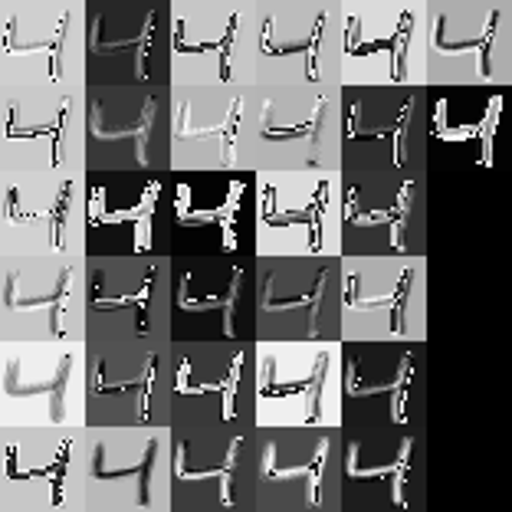

In [78]:
import taranis.core.visualization as viz 
transforms.ToPILImage()(viz.show_conv_layers(result)).resize((512, 512))

# New network with a convolution layer

From a single image it is going to learn to generate 32 new ones to better classify them

In [89]:
from torch.nn import init
from torch import Tensor
import math

import taranis.core.nn as ext_nn
        
conv_model = nn.Sequential(
    # ext_nn.MaskLayer((28, 28)),
    nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1),
    nn.ReLU(),
    nn.Conv2d(32, 64, 3, 1),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(576 * 64, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.Softmax(dim=1),
)

batch = transforms.ToTensor()(image).unsqueeze(0)
batch = torch.concat([batch, batch])
conv_model(batch).shape

torch.Size([2, 10])

## Training

In [90]:
loss_tracker['conv_model'] = []
trainfast('conv_model', conv_model, lr=1, epoch=2)
trainfast('conv_model', conv_model, lr=1, epoch=5)
trainfast('conv_model', conv_model, lr=1, epoch=5)
trainfast('conv_model', conv_model, lr=1, epoch=5)
trainfast('conv_model', conv_model, lr=0.5, epoch=5)

loss:  -0.3965: : 122880it [00:20, 6040.37it/s]                                                     
loss:  -0.6399: : 307200it [00:49, 6213.78it/s]                                                     
loss:  -0.6724: : 307200it [00:49, 6190.38it/s]                                                     
loss:  -0.7802: : 307200it [00:49, 6200.78it/s]                                                     
loss:  -0.9709: : 307200it [00:49, 6180.53it/s]                                                     


[-0.25017988681793213,
 -0.3965388536453247,
 -0.4054810404777527,
 -0.4222337305545807,
 -0.5311378836631775,
 -0.5962454080581665,
 -0.6399181485176086,
 -0.6465165615081787,
 -0.6596901416778564,
 -0.6655293703079224,
 -0.6698917150497437,
 -0.6724153161048889,
 -0.672096848487854,
 -0.6784977316856384,
 -0.6798688769340515,
 -0.687102735042572,
 -0.7802314758300781,
 -0.867223858833313,
 -0.9176542162895203,
 -0.9608089327812195,
 -0.9673359990119934,
 -0.9709305763244629]

## Compare

In [92]:
show_loss_curve()

alt.Chart(...)

In [82]:
testfast(linear)
testfast(deepmodel_bad)
testfast(deepmodel)
testfast(deepmodel_deep)
testfast(conv_model)

Accuracy 92.67 7.329999999999998
Accuracy 92.63 7.3700000000000045
Accuracy 96.45 3.549999999999997
Accuracy 85.09 14.909999999999997
Accuracy 30.819999999999997 69.18


## Inspect learned Convolution Kernels

torch.Size([32, 26, 26])


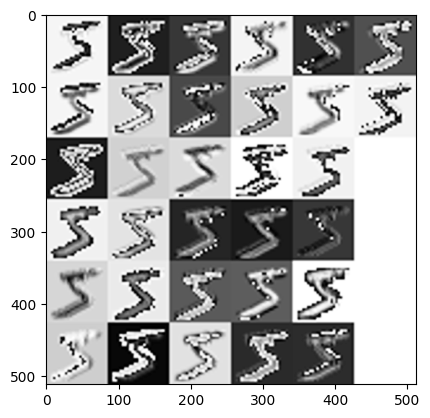

torch.Size([32, 26, 26])


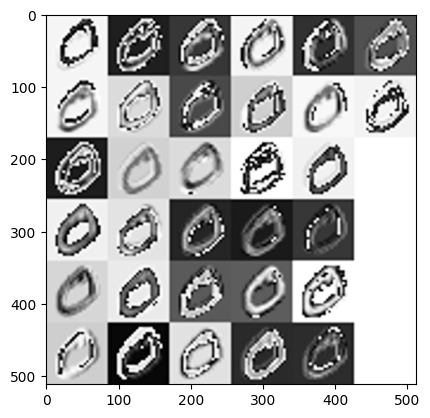

torch.Size([32, 26, 26])


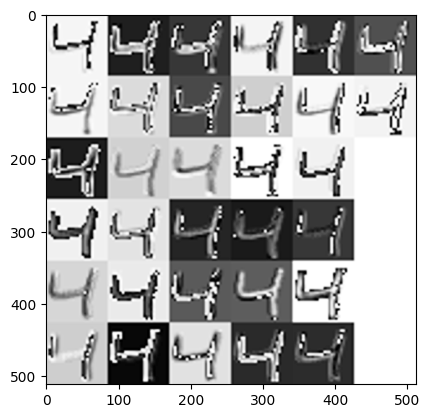

torch.Size([32, 26, 26])


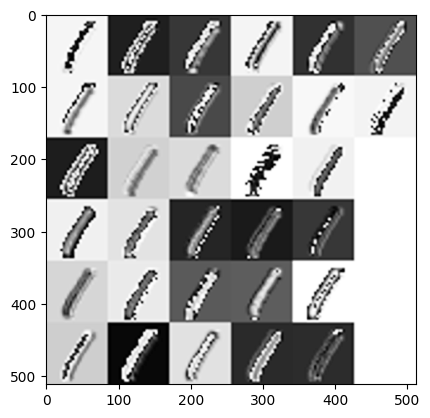

In [83]:
conv_model = conv_model.cpu()

for i in range(4):
    image, label = dataset[i]
    conv = list(conv_model.children())[0]

    batch = transforms.ToTensor()(image)
    result = conv(batch)
    print(result.shape)
    plt.imshow(transforms.ToPILImage()(viz.show_conv_layers(result)).resize((512, 512)), cmap='Greys')
    plt.show()

None torch.Size([1, 1, 28, 28])


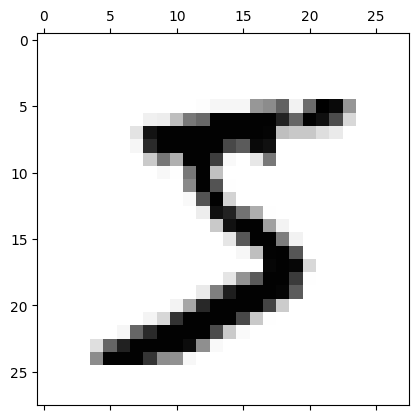

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 32, 26, 26])


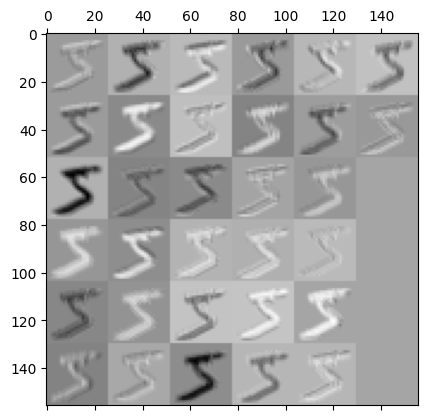

ReLU() torch.Size([1, 32, 26, 26])


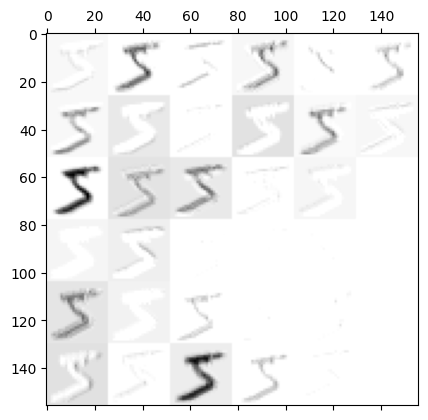

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 64, 24, 24])


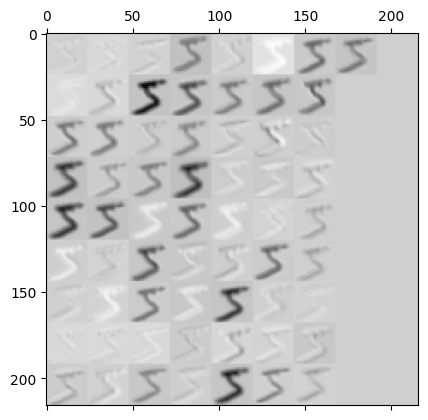

ReLU() torch.Size([1, 64, 24, 24])


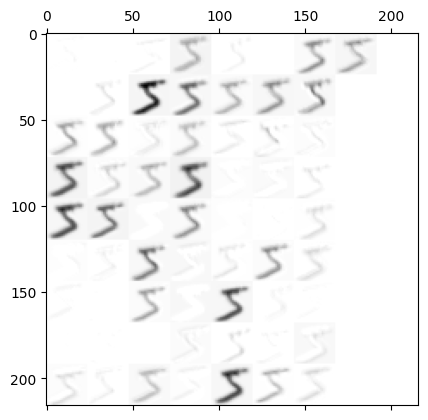

Skip flatten
Linear(in_features=36864, out_features=128, bias=True) torch.Size([1, 128])


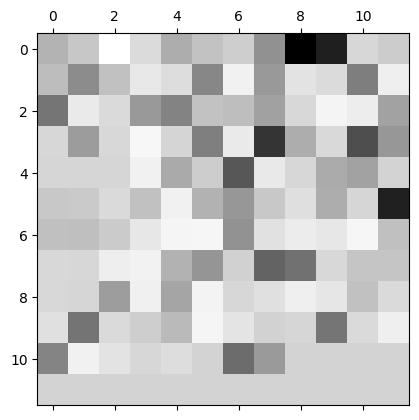

ReLU() torch.Size([1, 128])


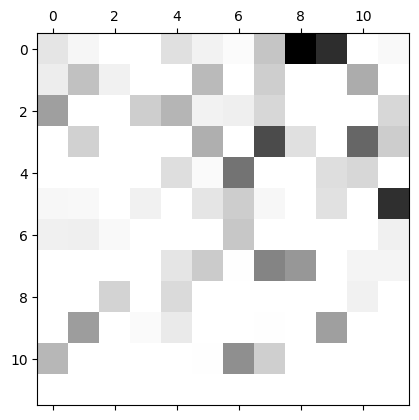

Linear(in_features=128, out_features=10, bias=True) torch.Size([1, 10])


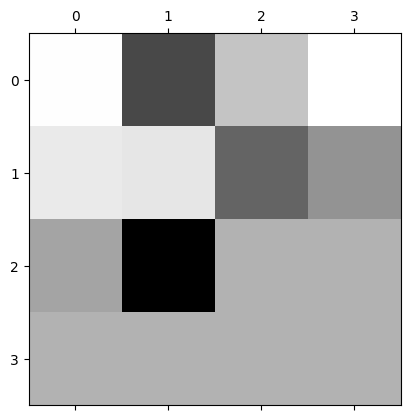

Softmax(dim=1) torch.Size([1, 10])


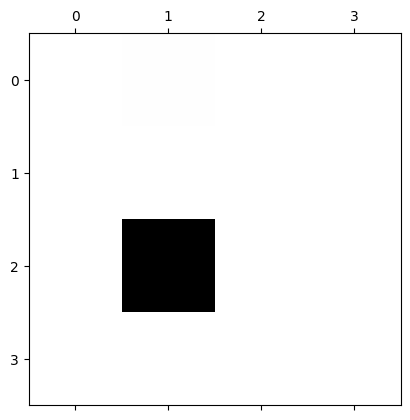

None torch.Size([1, 1, 28, 28])


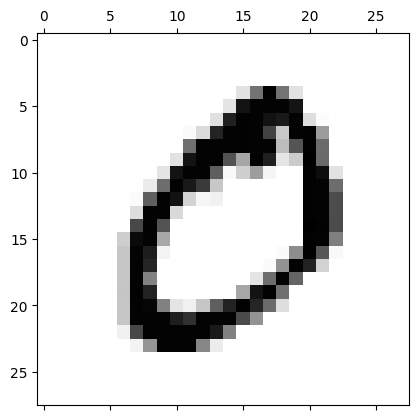

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 32, 26, 26])


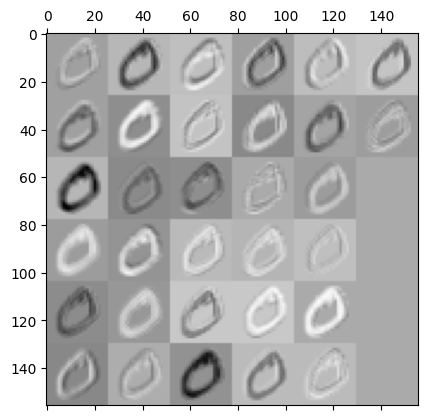

ReLU() torch.Size([1, 32, 26, 26])


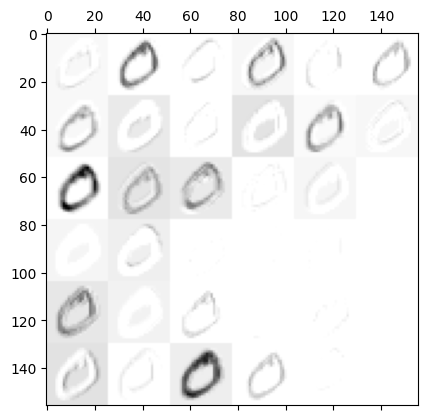

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 64, 24, 24])


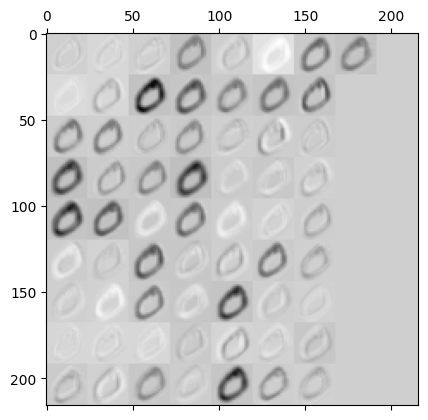

ReLU() torch.Size([1, 64, 24, 24])


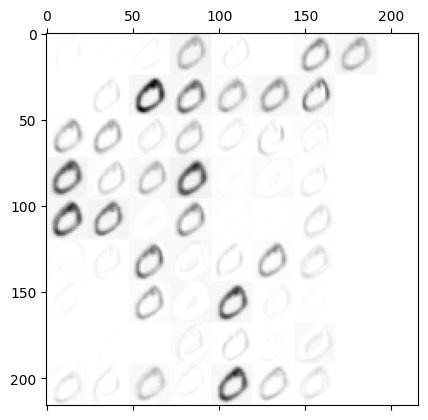

Skip flatten
Linear(in_features=36864, out_features=128, bias=True) torch.Size([1, 128])


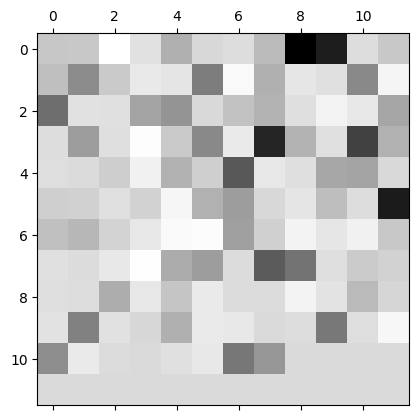

ReLU() torch.Size([1, 128])


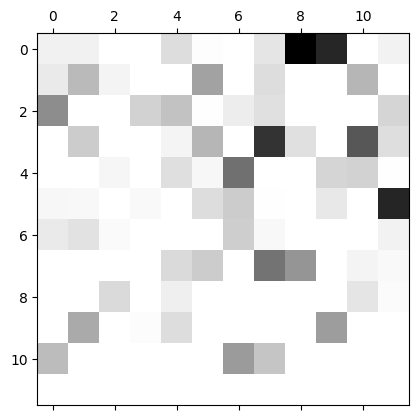

Linear(in_features=128, out_features=10, bias=True) torch.Size([1, 10])


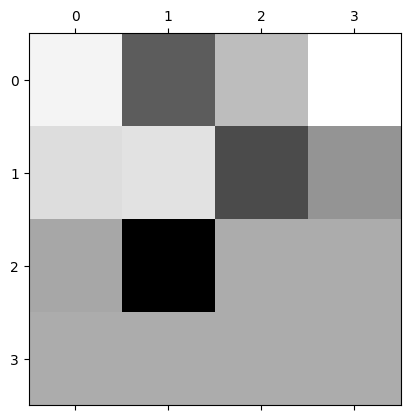

Softmax(dim=1) torch.Size([1, 10])


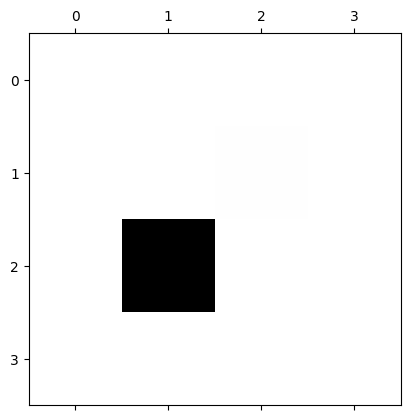

None torch.Size([1, 1, 28, 28])


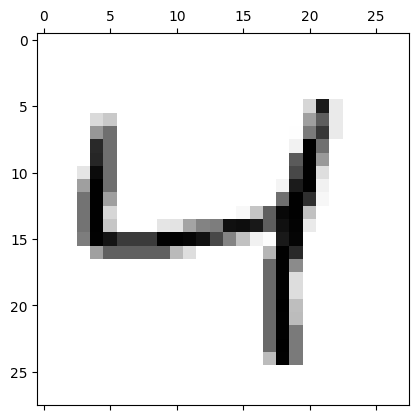

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 32, 26, 26])


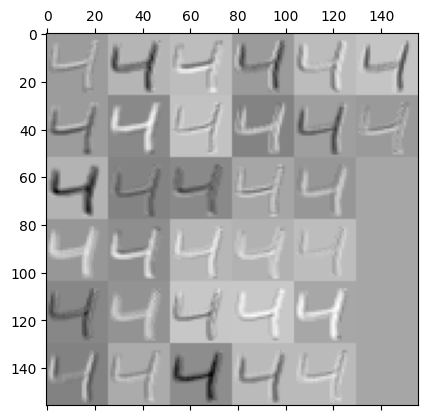

ReLU() torch.Size([1, 32, 26, 26])


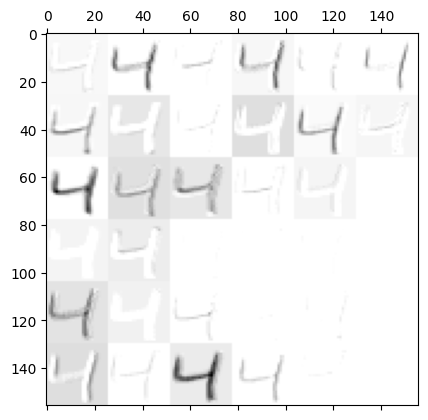

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 64, 24, 24])


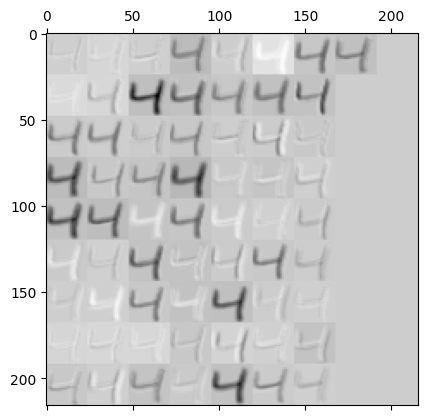

ReLU() torch.Size([1, 64, 24, 24])


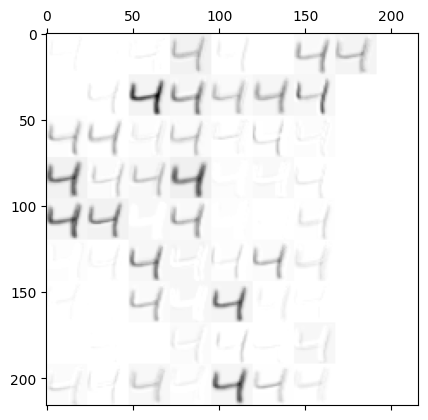

Skip flatten
Linear(in_features=36864, out_features=128, bias=True) torch.Size([1, 128])


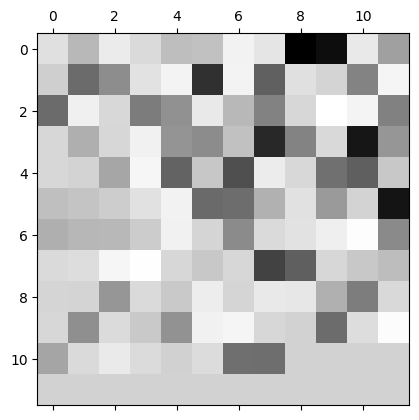

ReLU() torch.Size([1, 128])


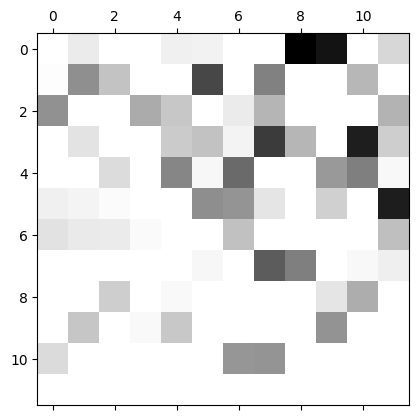

Linear(in_features=128, out_features=10, bias=True) torch.Size([1, 10])


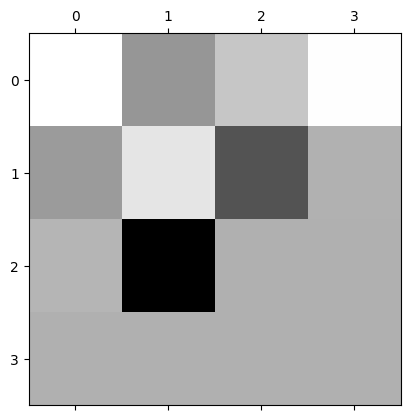

Softmax(dim=1) torch.Size([1, 10])


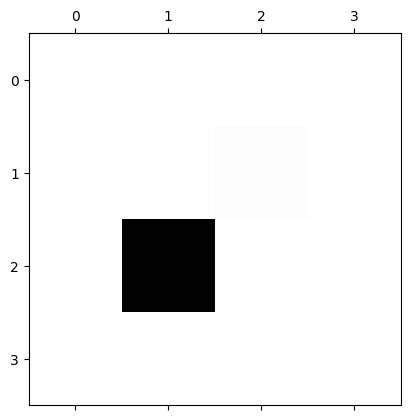

None torch.Size([1, 1, 28, 28])


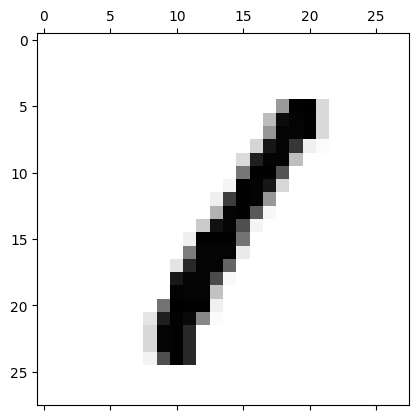

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 32, 26, 26])


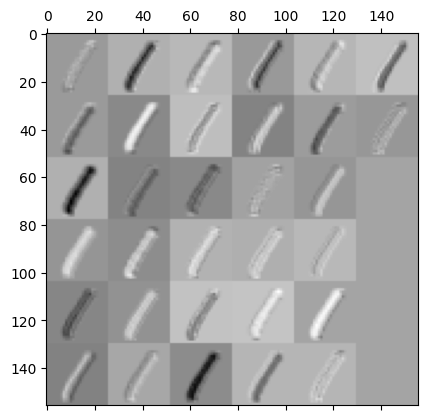

ReLU() torch.Size([1, 32, 26, 26])


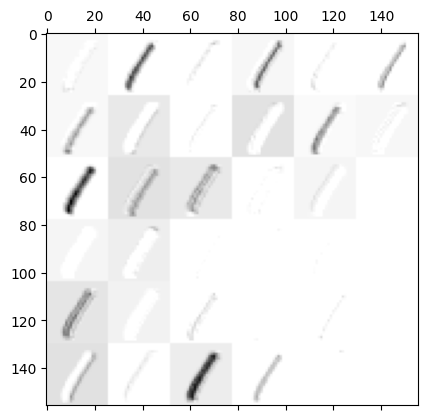

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 64, 24, 24])


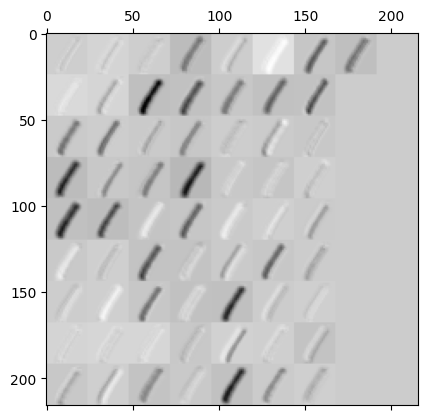

ReLU() torch.Size([1, 64, 24, 24])


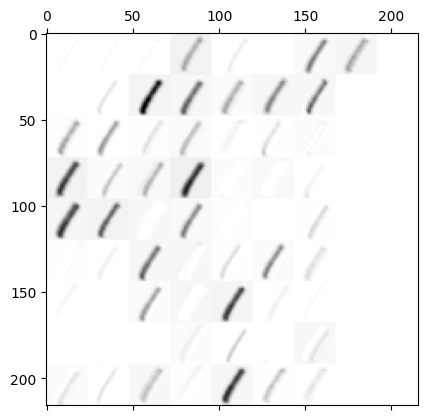

Skip flatten
Linear(in_features=36864, out_features=128, bias=True) torch.Size([1, 128])


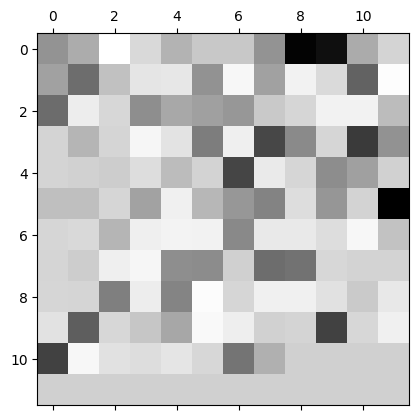

ReLU() torch.Size([1, 128])


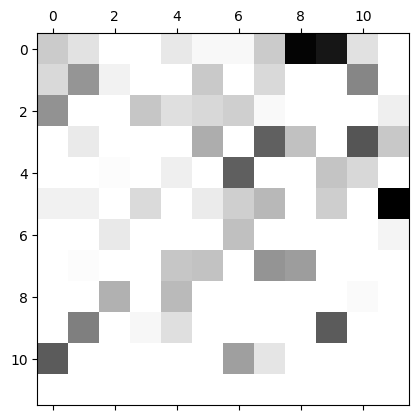

Linear(in_features=128, out_features=10, bias=True) torch.Size([1, 10])


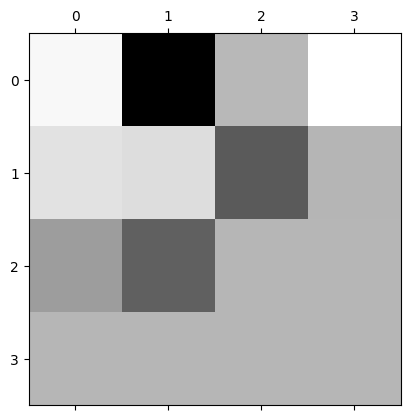

Softmax(dim=1) torch.Size([1, 10])


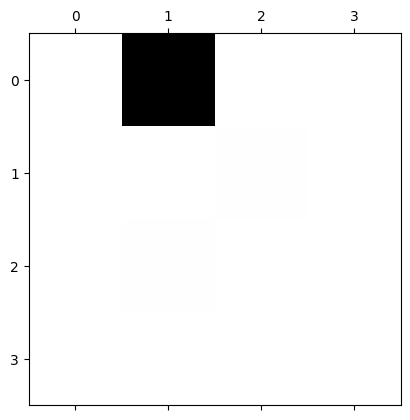

None torch.Size([1, 1, 28, 28])


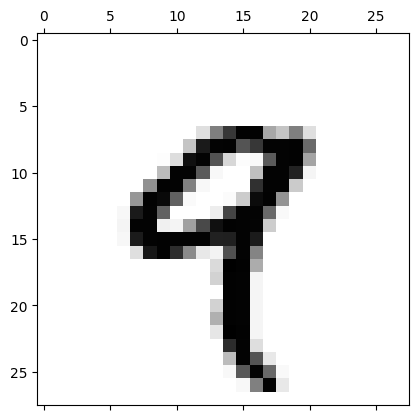

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 32, 26, 26])


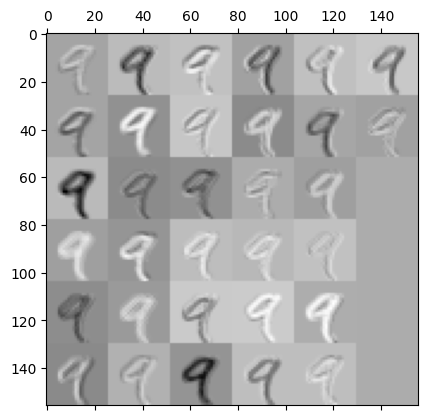

ReLU() torch.Size([1, 32, 26, 26])


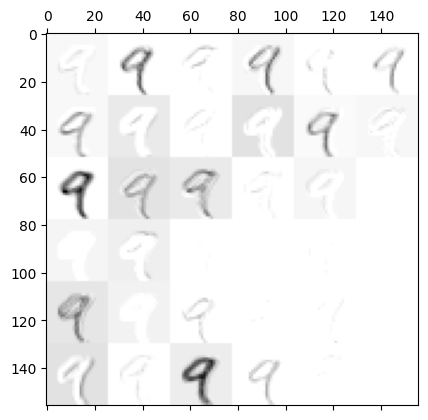

Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1)) torch.Size([1, 64, 24, 24])


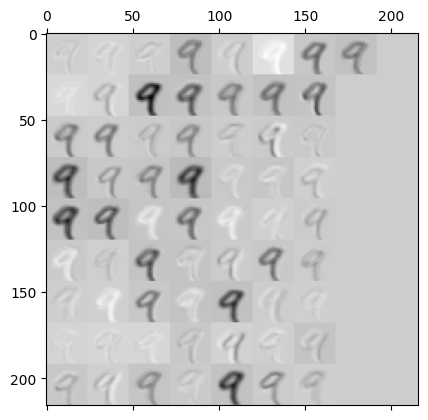

ReLU() torch.Size([1, 64, 24, 24])


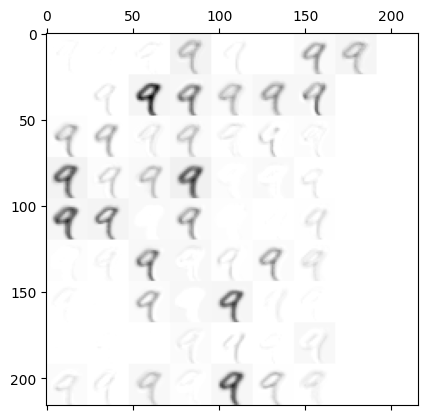

Skip flatten
Linear(in_features=36864, out_features=128, bias=True) torch.Size([1, 128])


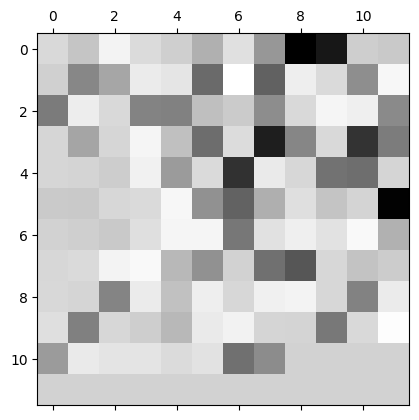

ReLU() torch.Size([1, 128])


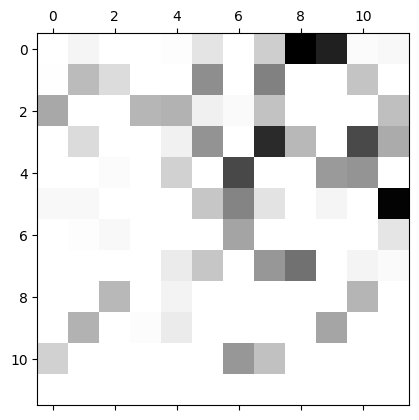

Linear(in_features=128, out_features=10, bias=True) torch.Size([1, 10])


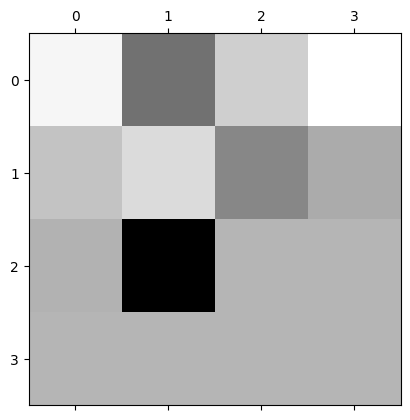

Softmax(dim=1) torch.Size([1, 10])


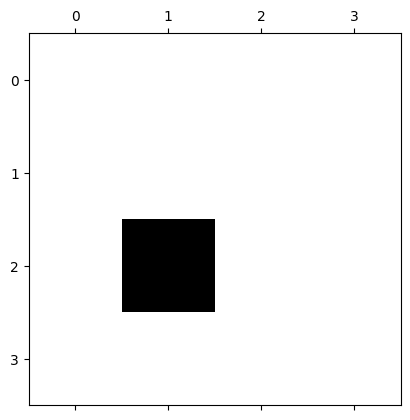

In [84]:
importlib.reload(viz)
viz.show_steps(conv_model, dataset)

In [85]:
# https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf
Image.from_file("AlexNetLearnedFeatures.PNG")

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xaf\x00\x00\x01{\x08\x06\x00\x00\x00e\xc4\x048\x…

## Spatial Transformer

In [86]:
class STN(nn.Module):
    def __init__(self):
        super(STN, self).__init__()
        self.localization = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=7),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True),
            nn.Conv2d(8, 10, kernel_size=5),
            nn.MaxPool2d(2, stride=2),
            nn.ReLU(True)
        )
        self.fc_loc = nn.Sequential(
            nn.Linear(10 * 3 * 3, 32),
            nn.ReLU(True),
            nn.Linear(32, 3 * 2)
        )
        
    def forward(self, x):
        xs = self.localization(x)
        xs = xs.view(-1, 10 * 3 * 3)
        
        theta = self.fc_loc(xs)
        theta = theta.view(-1, 2, 3)
        
        grid = F.affine_grid(theta, x.size())
        x = F.grid_sample(x, grid)
        return x


In [88]:
linear_stn = nn.Sequential(
    STN(),
    nn.Flatten(),                  # Flatten images from a 2D matrix to 1D => (28x28) => (784,)
    nn.Linear(784, n_class),        # Simple (a x + b) layer that will learn `a` and `b`
    nn.Softmax(dim=1)              # Normalization so result wil be between [0, 1]
)

trainfast('linear_stn', linear_stn, lr=1, epoch=2, batch_size=512)
trainfast('linear_stn', linear_stn, lr=1, epoch=5, batch_size=512)
trainfast('linear_stn', linear_stn, lr=1, epoch=5, batch_size=512)
trainfast('linear_stn', linear_stn, lr=1, epoch=5, batch_size=512)
trainfast('linear_stn', linear_stn, lr=0.5, epoch=5, batch_size=512)

loss:  -0.9247: : 120832it [00:01, 108732.91it/s]                                                   
loss:  -0.9713: : 302080it [00:02, 102270.28it/s]                                                   
loss:  -0.9787: : 302080it [00:02, 106592.96it/s]                                                   
loss:  -0.9819: : 302080it [00:02, 104616.08it/s]                                                   
loss:  -0.9843: : 302080it [00:02, 112028.08it/s]                                                   


alt.Chart(...)

In [93]:

testfast(linear)
testfast(deepmodel_bad)
testfast(deepmodel)
testfast(deepmodel_deep)
testfast(conv_model)
testfast(linear_stn)

show_loss_curve()

Accuracy 92.67 7.329999999999998
Accuracy 92.63 7.3700000000000045
Accuracy 96.45 3.549999999999997
Accuracy 85.09 14.909999999999997
Accuracy 97.31 2.6899999999999977
Accuracy 97.48 2.519999999999996


alt.Chart(...)

# Reinforcement Learning

In [115]:
import gym

with gym.make('ALE/Breakout-v5', render_mode='human') as env:
    env.reset()

    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    
    for i in range(10):
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        
    env.close()

In [116]:
from collections import defaultdict

import matplotlib.pyplot as plt
import torch
from tensordict.nn import TensorDictModule
from tensordict.nn.distributions import NormalParamExtractor
from torch import nn
from torchrl.collectors import SyncDataCollector
from torchrl.data.replay_buffers import ReplayBuffer
from torchrl.data.replay_buffers.samplers import SamplerWithoutReplacement
from torchrl.data.replay_buffers.storages import LazyTensorStorage
from torchrl.envs import (Compose, DoubleToFloat, ObservationNorm, StepCounter,
                          TransformedEnv)
from torchrl.envs.libs.gym import GymEnv
from torchrl.envs.utils import check_env_specs, set_exploration_mode
from torchrl.modules import ProbabilisticActor, TanhNormal, ValueOperator
from torchrl.objectives import ClipPPOLoss
from torchrl.objectives.value import GAE
from tqdm import tqdm
import ale_py

In [117]:
GymEnv.available_envs

['ALE/Adventure-ram-v5',
 'ALE/Adventure-v5',
 'ALE/AirRaid-ram-v5',
 'ALE/AirRaid-v5',
 'ALE/Alien-ram-v5',
 'ALE/Alien-v5',
 'ALE/Amidar-ram-v5',
 'ALE/Amidar-v5',
 'ALE/Assault-ram-v5',
 'ALE/Assault-v5',
 'ALE/Asterix-ram-v5',
 'ALE/Asterix-v5',
 'ALE/Asteroids-ram-v5',
 'ALE/Asteroids-v5',
 'ALE/Atlantis-ram-v5',
 'ALE/Atlantis-v5',
 'ALE/Atlantis2-ram-v5',
 'ALE/Atlantis2-v5',
 'ALE/Backgammon-ram-v5',
 'ALE/Backgammon-v5',
 'ALE/BankHeist-ram-v5',
 'ALE/BankHeist-v5',
 'ALE/BasicMath-ram-v5',
 'ALE/BasicMath-v5',
 'ALE/BattleZone-ram-v5',
 'ALE/BattleZone-v5',
 'ALE/BeamRider-ram-v5',
 'ALE/BeamRider-v5',
 'ALE/Berzerk-ram-v5',
 'ALE/Berzerk-v5',
 'ALE/Blackjack-ram-v5',
 'ALE/Blackjack-v5',
 'ALE/Bowling-ram-v5',
 'ALE/Bowling-v5',
 'ALE/Boxing-ram-v5',
 'ALE/Boxing-v5',
 'ALE/Breakout-ram-v5',
 'ALE/Breakout-v5',
 'ALE/Carnival-ram-v5',
 'ALE/Carnival-v5',
 'ALE/Casino-ram-v5',
 'ALE/Casino-v5',
 'ALE/Centipede-ram-v5',
 'ALE/Centipede-v5',
 'ALE/ChopperCommand-ram-v5',
 'ALE/

In [118]:
device = "cpu" if not torch.has_cuda else "cuda:0"
num_cells = 256  # number of cells in each layer i.e. output dim.
lr = 3e-4
max_grad_norm = 1.0

In [119]:
frame_skip = 1
frames_per_batch = 1000 // frame_skip
# For a complete training, bring the number of frames up to 1M
total_frames = 50_000 // frame_skip

In [120]:
sub_batch_size = 64  # cardinality of the sub-samples gathered from the current data in the inner loop
num_epochs = 10  # optimization steps per batch of data collected
clip_epsilon = (
    0.2  # clip value for PPO loss: see the equation in the intro for more context.
)
gamma = 0.99
lmbda = 0.95
entropy_eps = 1e-4

In [121]:
base_env = GymEnv("Breakout-v4", device=device, frame_skip=frame_skip)

In [122]:
base_env.action_space

Discrete(4)

In [123]:
from tensordict import TensorDict

env = TransformedEnv(
    base_env,
    Compose(
        # normalize observations
        ObservationNorm(in_keys=["observation"]),
        DoubleToFloat(in_keys=["observation"]),
        StepCounter(),
    ),
)

In [124]:
env.transform[0].init_stats(num_iter=1000, reduce_dim=0, cat_dim=0)

TypeError: len() of unsized object

In [ ]:
actor_net = nn.Sequential(
    nn.LazyLinear(num_cells, device=device),
    nn.Tanh(),
    nn.LazyLinear(num_cells, device=device),
    nn.Tanh(),
    nn.LazyLinear(num_cells, device=device),
    nn.Tanh(),
    nn.LazyLinear(2 * env.action_spec.shape[-1], device=device),
    NormalParamExtractor(),
)

policy_module = TensorDictModule(
    actor_net, in_keys=["observation"], out_keys=["loc", "scale"]
)

In [ ]:
policy_module = ProbabilisticActor(
    module=policy_module,
    spec=env.action_spec,
    in_keys=["loc", "scale"],
    distribution_class=TanhNormal,
    distribution_kwargs={
        "min": env.action_spec.space.minimum,
        "max": env.action_spec.space.maximum,
    },
    return_log_prob=True,
    # we'll need the log-prob for the numerator of the importance weights
)

In [ ]:
value_net = nn.Sequential(
    nn.LazyLinear(num_cells, device=device),
    nn.Tanh(),
    nn.LazyLinear(num_cells, device=device),
    nn.Tanh(),
    nn.LazyLinear(num_cells, device=device),
    nn.Tanh(),
    nn.LazyLinear(1, device=device),
)

value_module = ValueOperator(
    module=value_net,
    in_keys=["observation"],
)

In [ ]:
print("Running policy:", policy_module(env.reset()))
print("Running value:", value_module(env.reset()))

In [ ]:
collector = SyncDataCollector(
    env,
    policy_module,
    frames_per_batch=frames_per_batch,
    total_frames=total_frames,
    split_trajs=False,
    device=device,
)

In [ ]:
replay_buffer = ReplayBuffer(
    storage=LazyTensorStorage(frames_per_batch),
    sampler=SamplerWithoutReplacement(),
)

In [ ]:
advantage_module = GAE(
    gamma=gamma, lmbda=lmbda, value_network=value_module, average_gae=True
)

loss_module = ClipPPOLoss(
    actor=policy_module,
    critic=value_module,
    advantage_key="advantage",
    clip_epsilon=clip_epsilon,
    entropy_bonus=bool(entropy_eps),
    entropy_coef=entropy_eps,
    # these keys match by default but we set this for completeness
    value_target_key=advantage_module.value_target_key,
    critic_coef=1.0,
    gamma=0.99,
    loss_critic_type="smooth_l1",
)

optim = torch.optim.Adam(loss_module.parameters(), lr)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optim, total_frames // frames_per_batch, 0.0
)

In [ ]:
logs = defaultdict(list)
pbar = tqdm(total=total_frames * frame_skip)
eval_str = ""

# We iterate over the collector until it reaches the total number of frames it was
# designed to collect:
for i, tensordict_data in enumerate(collector):
    # we now have a batch of data to work with. Let's learn something from it.
    for _ in range(num_epochs):
        # We'll need an "advantage" signal to make PPO work.
        # We re-compute it at each epoch as its value depends on the value
        # network which is updated in the inner loop.
        advantage_module(tensordict_data)
        data_view = tensordict_data.reshape(-1)
        replay_buffer.extend(data_view.cpu())
        for _ in range(frames_per_batch // sub_batch_size):
            subdata = replay_buffer.sample(sub_batch_size)
            loss_vals = loss_module(subdata.to(device))
            loss_value = (
                loss_vals["loss_objective"]
                + loss_vals["loss_critic"]
                + loss_vals["loss_entropy"]
            )

            # Optimization: backward, grad clipping and optimization step
            loss_value.backward()
            # this is not strictly mandatory but it's good practice to keep
            # your gradient norm bounded
            torch.nn.utils.clip_grad_norm_(loss_module.parameters(), max_grad_norm)
            optim.step()
            optim.zero_grad()

    logs["reward"].append(tensordict_data["next", "reward"].mean().item())
    pbar.update(tensordict_data.numel() * frame_skip)
    cum_reward_str = (
        f"average reward={logs['reward'][-1]: 4.4f} (init={logs['reward'][0]: 4.4f})"
    )
    logs["step_count"].append(tensordict_data["step_count"].max().item())
    stepcount_str = f"step count (max): {logs['step_count'][-1]}"
    logs["lr"].append(optim.param_groups[0]["lr"])
    lr_str = f"lr policy: {logs['lr'][-1]: 4.4f}"
    if i % 10 == 0:
        # We evaluate the policy once every 10 batches of data.
        # Evaluation is rather simple: execute the policy without exploration
        # (take the expected value of the action distribution) for a given
        # number of steps (1000, which is our ``env`` horizon).
        # The ``rollout`` method of the ``env`` can take a policy as argument:
        # it will then execute this policy at each step.
        with set_exploration_mode("mean"), torch.no_grad():
            # execute a rollout with the trained policy
            eval_rollout = env.rollout(1000, policy_module)
            logs["eval reward"].append(eval_rollout["next", "reward"].mean().item())
            logs["eval reward (sum)"].append(
                eval_rollout["next", "reward"].sum().item()
            )
            logs["eval step_count"].append(eval_rollout["step_count"].max().item())
            eval_str = (
                f"eval cumulative reward: {logs['eval reward (sum)'][-1]: 4.4f} "
                f"(init: {logs['eval reward (sum)'][0]: 4.4f}), "
                f"eval step-count: {logs['eval step_count'][-1]}"
            )
            del eval_rollout
    pbar.set_description(", ".join([eval_str, cum_reward_str, stepcount_str, lr_str]))

    # We're also using a learning rate scheduler. Like the gradient clipping,
    # this is a nice-to-have but nothing necessary for PPO to work.
    scheduler.step()

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(logs["reward"])
plt.title("training rewards (average)")
plt.subplot(2, 2, 2)
plt.plot(logs["step_count"])
plt.title("Max step count (training)")
plt.subplot(2, 2, 3)
plt.plot(logs["eval reward (sum)"])
plt.title("Return (test)")
plt.subplot(2, 2, 4)
plt.plot(logs["eval step_count"])
plt.title("Max step count (test)")
plt.show()

# LLM

In [162]:
eps = np.random.normal(0, 3, 21)

x = np.asarray(list(range(-10, 11)))
y = x ** 2 + eps

print('x:', x[:5])
print('y:', y[:5])

x: [-10  -9  -8  -7  -6]
y: [100.3920658   81.01226602  64.47644114  54.02651576  30.00470317]


# FakeAttention

In [185]:
from math import sqrt

class Attention(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        
        self.q = nn.Linear(input_size, output_size)
        self.k = nn.Linear(input_size, output_size)
        self.v = nn.Linear(input_size, output_size)
        self.o = nn.Linear(output_size, input_size)
        self.n = output_size
        
        torch.nn.init.eye_(self.q.weight)
        torch.nn.init.eye_(self.k.weight)
        torch.nn.init.eye_(self.v.weight)
        torch.nn.init.eye_(self.o.weight)

    def forward(self, x):
        xq = self.q(x) 
        xk = self.k(x) 
        xv = self.v(x)
        
        if len(x.shape) == 2 :
            xq = xq.unsqueeze(1)
            xk = xk.unsqueeze(1)
            xv = xv.unsqueeze(1)

        out = xq @ xk.transpose(1, 2) / sqrt(self.n)
        
        # out = self.activation(out) 
        
        out = self.o(out @ xv)
        
        return out.squeeze(1)

In [186]:
model = Attention(1, 100)

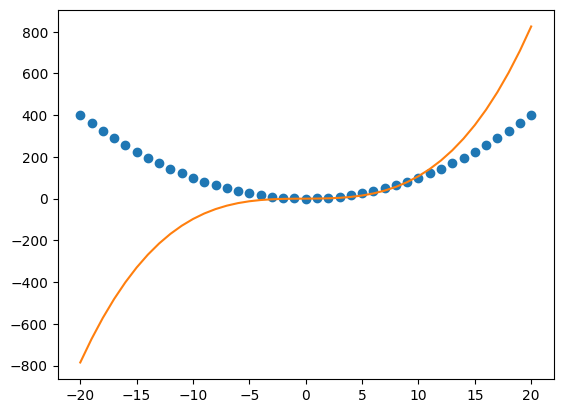

In [187]:
show_model_estimate(model, x, y)

139178.4375
465.1363525390625
490.60809326171875
357.5312805175781
266.78936767578125
269.41925048828125
260.6796569824219
223.8103790283203
232.70103454589844
232.4054412841797


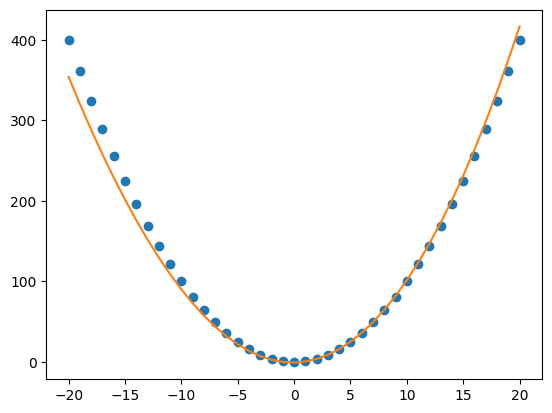

In [188]:
train_reg(model, x, y, 1000, lr=0.001)
show_model_estimate(model, x, y)

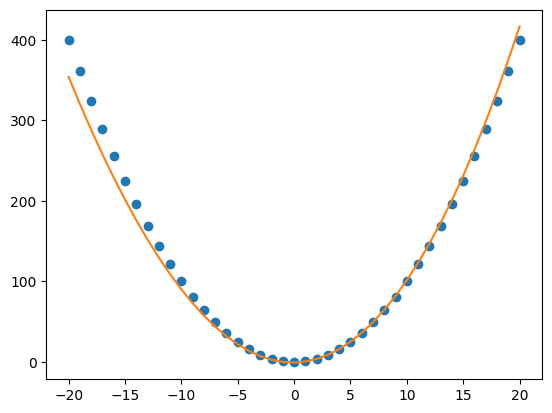

In [189]:
x = np.asarray(list(range(-20, 21)))
y = x ** 2

show_model_estimate(model, x, y)

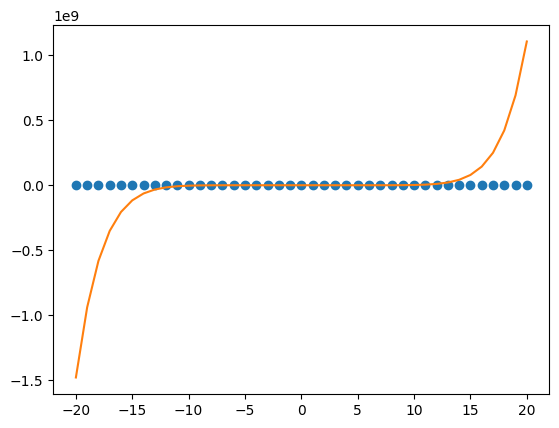

In [198]:
model = nn.Sequential(
    Attention(1, 20),   
    Attention(1, 20),
)
show_model_estimate(model, x, y)

295.1612243652344
407.0932312011719
269.69622802734375
1007.669189453125
438.11590576171875
433.64056396484375
402.8755798339844
463.45355224609375
330.4691162109375
308.48431396484375


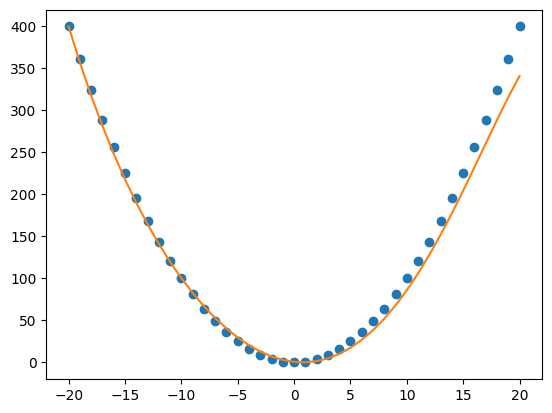

In [206]:
train_reg(model, x, y, 4000, lr=0.0001)
show_model_estimate(model, x, y)

154.23831176757812
0.10080964863300323
0.055575113743543625
0.032035622745752335
0.021296488121151924
0.02103729359805584
0.01220378465950489
0.012266431003808975
0.014006457291543484
0.009115665219724178


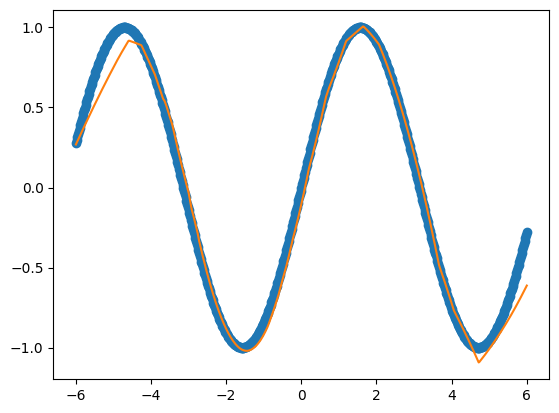

In [230]:
x = np.asarray(list(range(-300, 301))) / 50
y = np.sin(x)

model = nn.Sequential(
    nn.Linear(1, 50),
    Attention(50, 100),
    nn.Linear(50, 100),
    nn.ReLU(),
    nn.Linear(100, 1)
)

# show_model_estimate(model, x, y)
train_reg(model, x, y, 8000, lr=0.0001)
show_model_estimate(model, x, y)

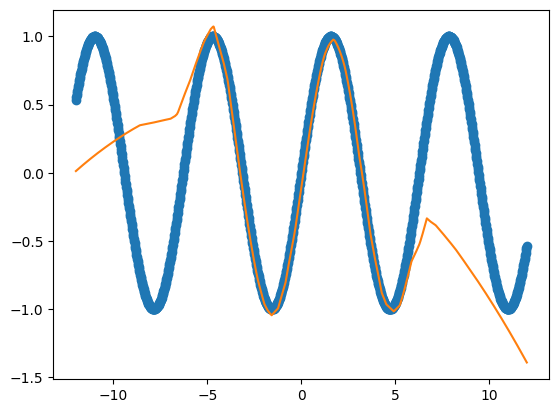

In [229]:
x = np.asarray(list(range(-600, 601))) / 50
y = np.sin(x)

show_model_estimate(model, x, y)